In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

import random
random.seed(10)
print(random.random()) 
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

0.5714025946899135
-----
anndata     0.8.0
scanpy      1.9.3
-----
PIL                         9.4.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.1
cloudpickle                 3.0.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.3
dask                        2023.5.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.8.0
igraph                      0.10.1
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
jinja2                      3.0.3
joblib                      1.2.0
jupyter_server              1.18.1
kiwisolver                  1.4.4
leidenalg                   0.9.1
llvmlite     

In [2]:
adata1 = sc.read_10x_h5('/home/julia/data/placodes/P27217_1001/PLACODESmap/outs/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/P27217_1001/PLACODESmap/outs/filtered_feature_bc_matrix.h5
 (0:00:02)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


normalizing counts per cell
    finished (0:00:00)


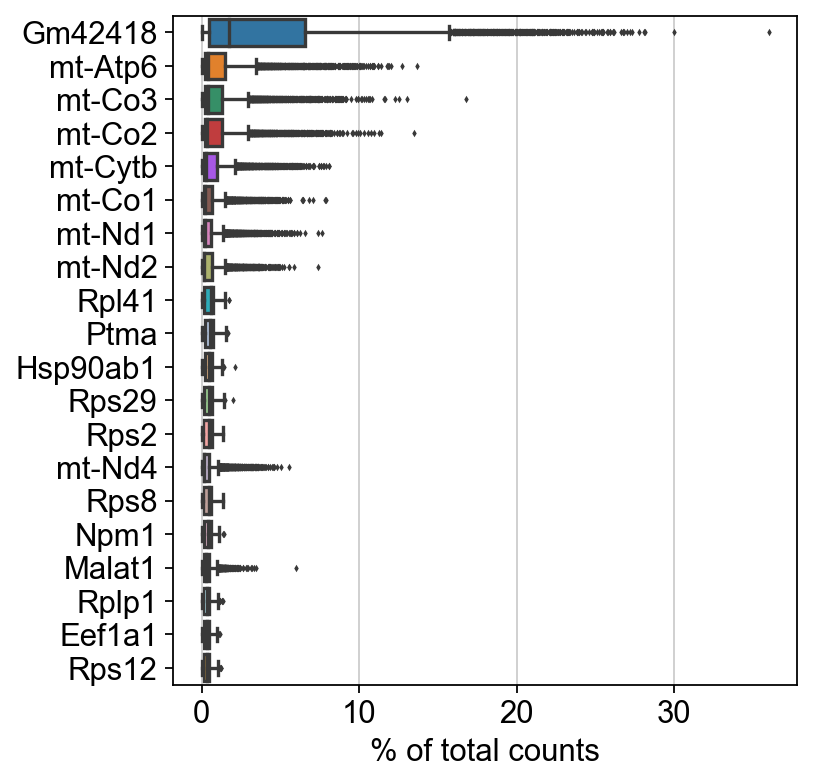

filtered out 8 cells that have less than 200 genes expressed
filtered out 9063 genes that are detected in less than 3 cells


In [3]:
adata1.var_names_make_unique() 
adata1.obs["plate"] = "P27217_1001"
adata1.obs["day"] = "E8.5" 
adata1.obs["location"] = "head" 
adata1.layers["counts"] = adata1.X.copy()
adata1.obs_names_make_unique()
adata1.obs["sample_id"] = adata1.obs["plate"]
adata1.obs["genotype"] = "wild_type"
adata1.obs["GSM"] = "GSM_P27217_1001"
adata1.obs["sample_id"] = adata1.obs["plate"]
adata1.obs["genotype"] = "wild_type"
adata1.obs["GSM"] = "GSM_P27217_1001"
adata1.var['mt'] = adata1.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata1, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.highest_expr_genes(adata1, n_top=20, )
sc.pp.filter_cells(adata1, min_genes=200)
sc.pp.filter_genes(adata1, min_cells=3)
adata1 = adata1[adata1.obs.n_genes_by_counts > 2000, :].copy()
adata1 = adata1[adata1.obs.total_counts > 12000, :].copy()
adata1 = adata1[adata1.obs.total_counts < 100000, :].copy()
adata1 = adata1[adata1.obs.pct_counts_mt < 10, :].copy()

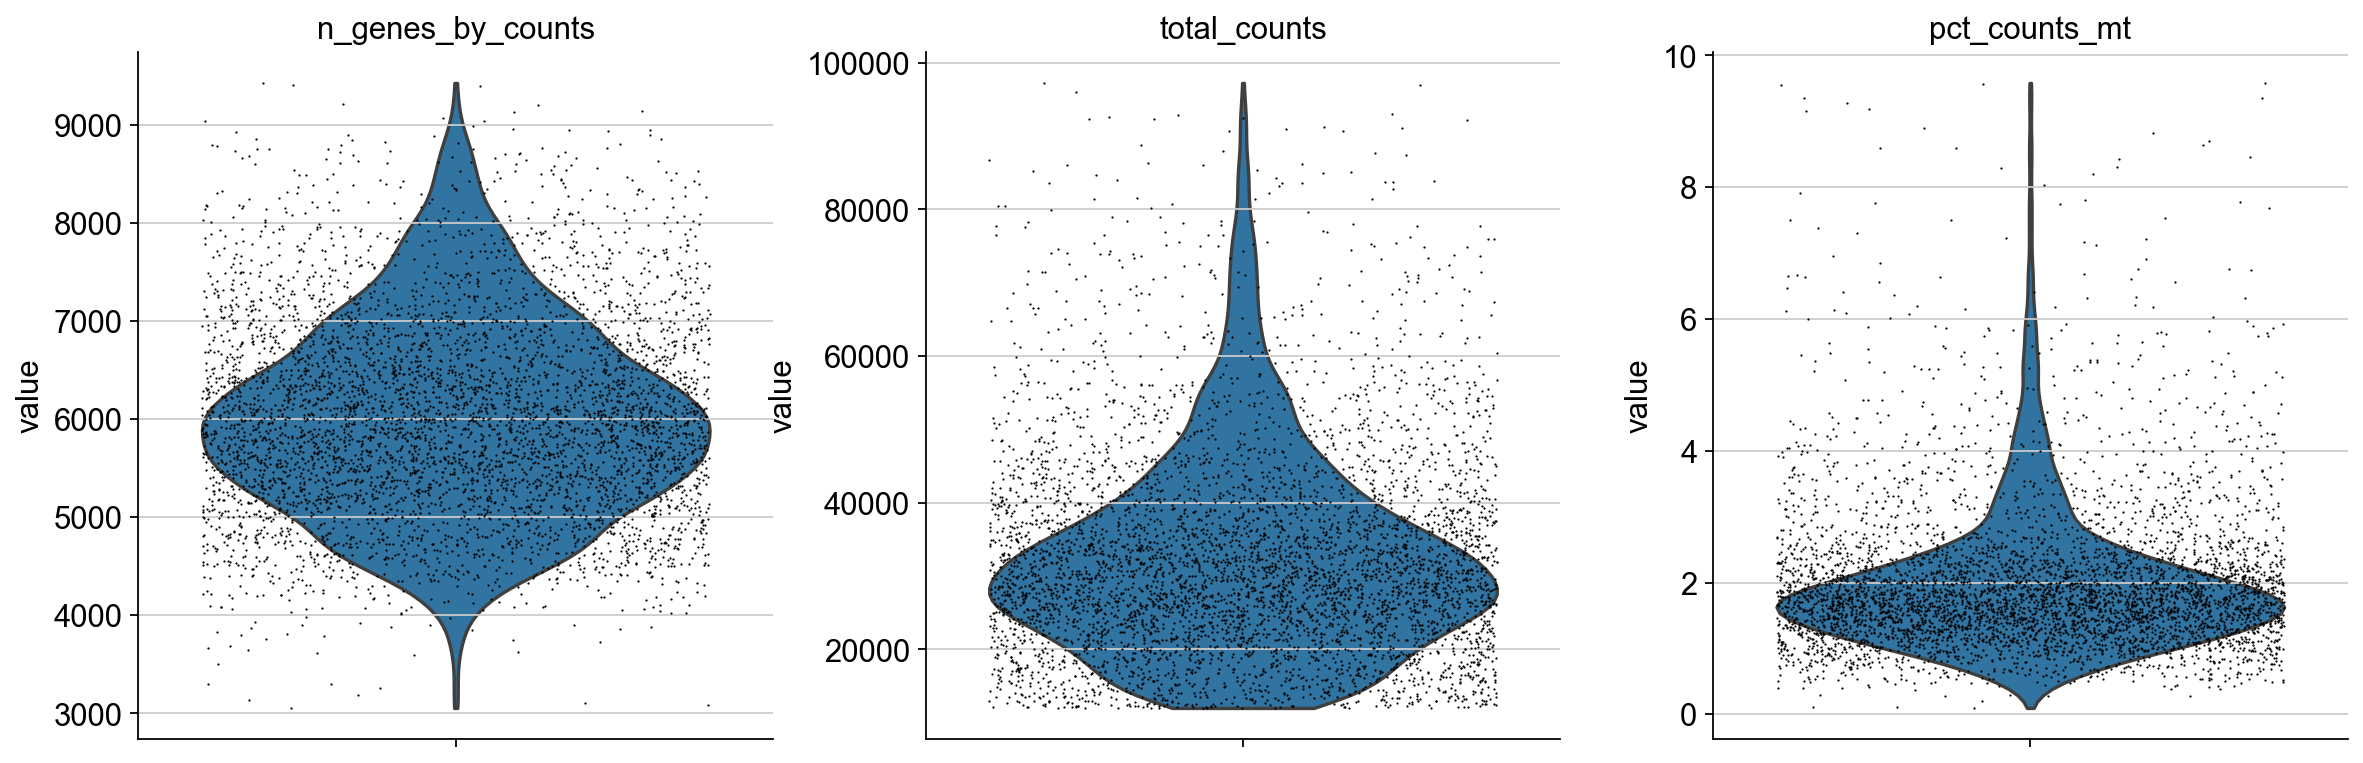

In [4]:
sc.pl.violin(adata1, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [5]:
sc.external.pp.scrublet(adata1) #estimates doublets
adata1 = adata1[adata1.obs['predicted_doublet'] == False] #do the actual filtering
adata1

Running Scrublet
filtered out 313 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.55
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 5.9%
    Scrublet finished (0:00:12)


View of AnnData object with n_obs × n_vars = 5237 × 23222
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'scrublet'
    layers: 'counts'

In [6]:
adata1

View of AnnData object with n_obs × n_vars = 5237 × 23222
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'scrublet'
    layers: 'counts'

In [7]:
adata2 = sc.read_10x_h5('/home/julia/data/placodes/19-01-2023/P28111_1002_mapped_1/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/19-01-2023/P28111_1002_mapped_1/filtered_feature_bc_matrix.h5
 (0:00:01)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
adata2

AnnData object with n_obs × n_vars = 5792 × 32285
    var: 'gene_ids', 'feature_types', 'genome'

normalizing counts per cell
    finished (0:00:00)


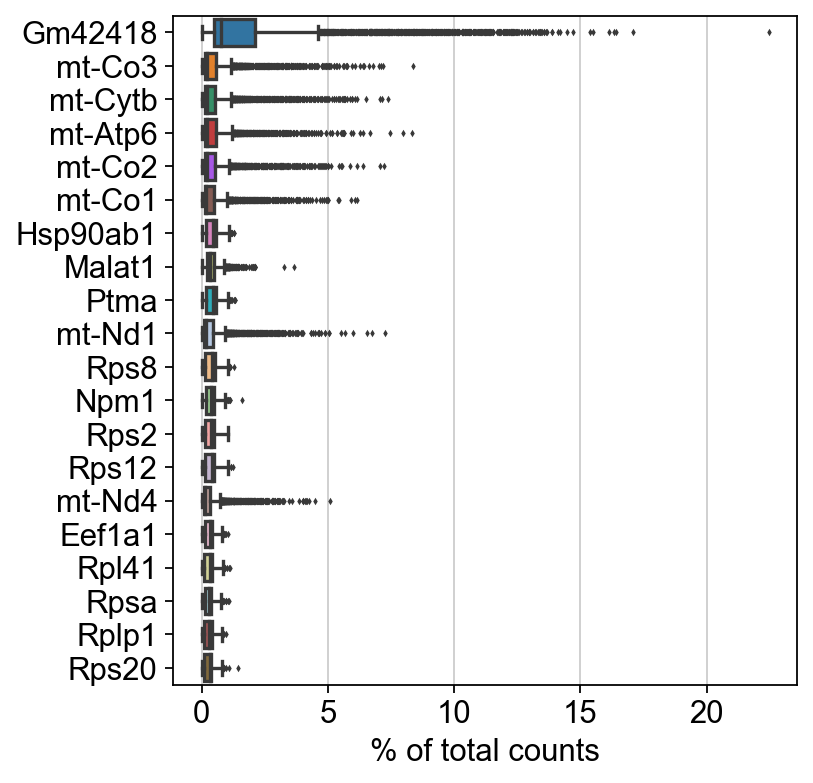

filtered out 9189 genes that are detected in less than 3 cells


In [9]:
adata2.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata2.obs["plate"] = "P28111_1002" # Записываем в `adata.obs` название платформы
adata2.obs["day"] = "E9.5" # Записываем в `adata.obs` название платформы
adata2.obs["location"] = "Otic"
adata2.layers["counts"] = adata2.X.copy() # Сразу создаём слой с каунтами
adata2.obs_names_make_unique()
adata2.obs["sample_id"] = adata2.obs["plate"]
adata2.obs["genotype"] = "wild_type"
adata2.obs["GSM"] = "GSM_P28111_1002"
sc.pl.highest_expr_genes(adata2, n_top=20, )
sc.pp.filter_cells(adata2, min_genes=200)
sc.pp.filter_genes(adata2, min_cells=3)

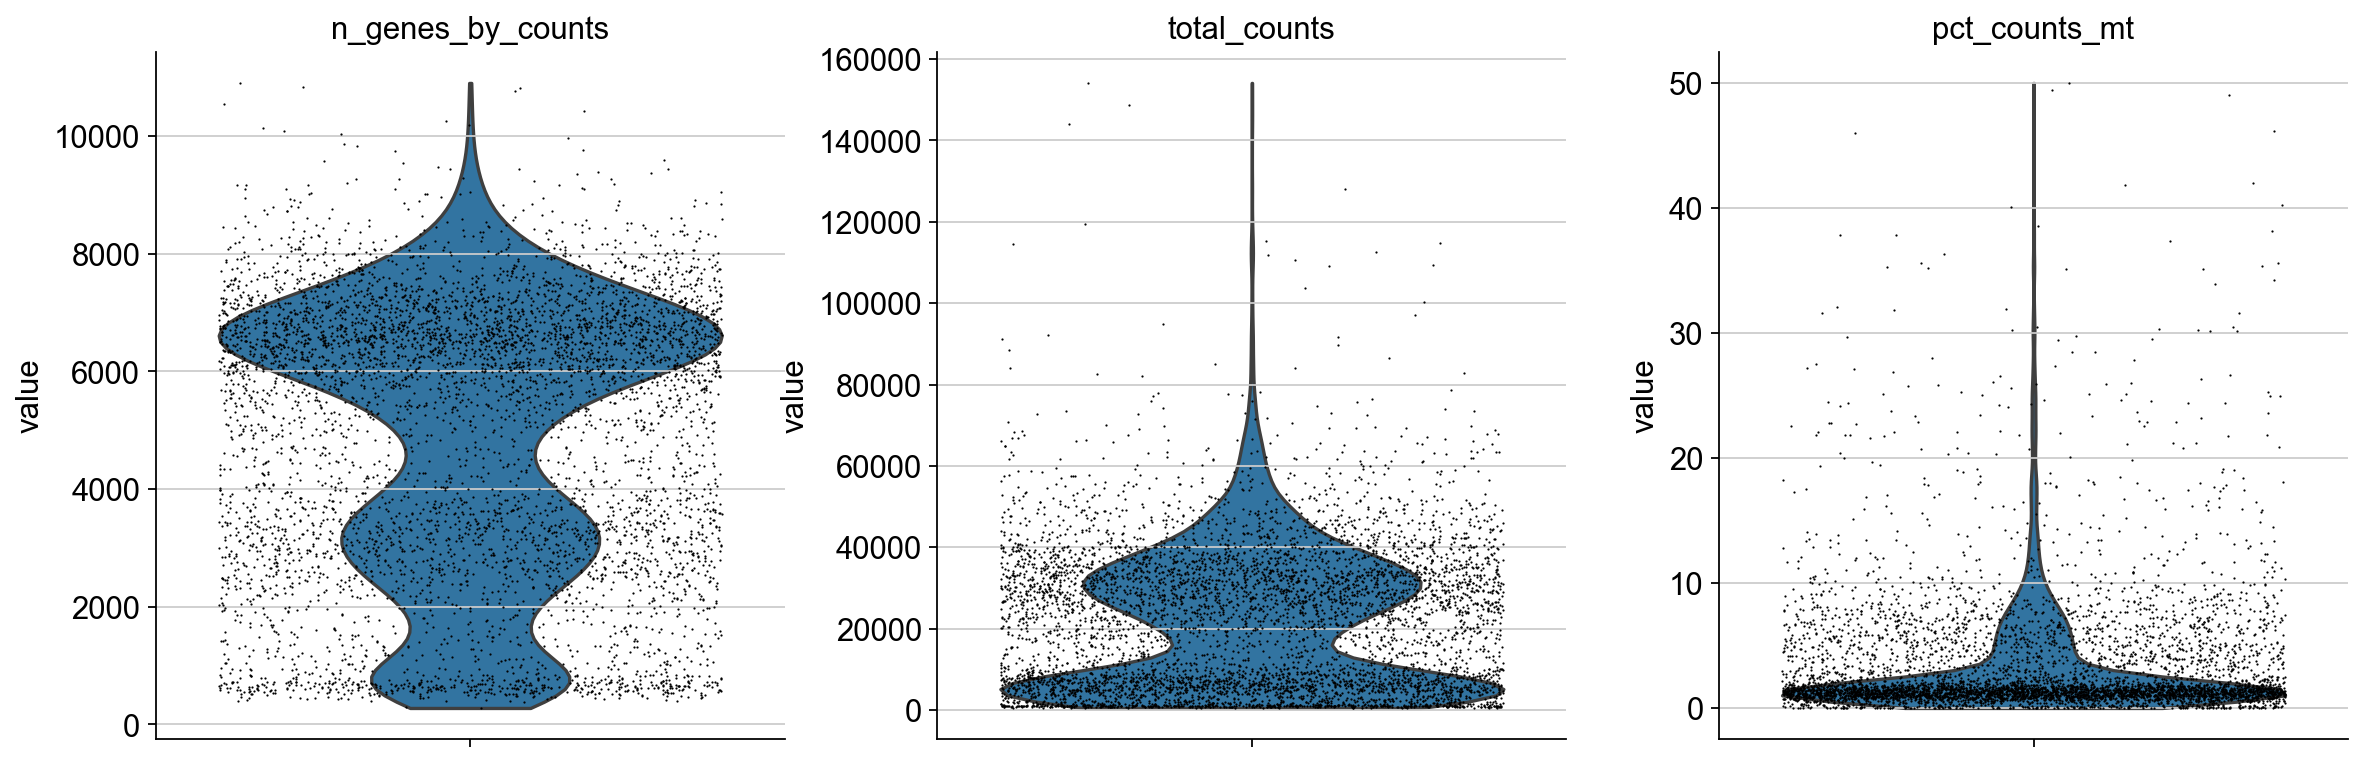

In [10]:
adata2.var['mt'] = adata2.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata2, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata2, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [11]:
adata2 = adata2[adata2.obs.n_genes_by_counts < 10000, :].copy()
adata2 = adata2[adata2.obs.n_genes_by_counts > 2000, :].copy()
adata2 = adata2[adata2.obs.total_counts > 9500, :].copy()
adata2 = adata2[adata2.obs.total_counts < 100000, :].copy()
adata2 = adata2[adata2.obs.pct_counts_mt < 15, :].copy()

In [12]:
sc.external.pp.scrublet(adata2) #estimates doublets
adata2 = adata2[adata2.obs['predicted_doublet'] == False] #do the actual filtering
adata2

Running Scrublet
filtered out 276 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.16
Detected doublet rate = 4.9%
Estimated detectable doublet fraction = 63.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 7.7%
    Scrublet finished (0:00:08)


View of AnnData object with n_obs × n_vars = 3518 × 23096
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [13]:
adata2

View of AnnData object with n_obs × n_vars = 3518 × 23096
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [14]:
adata3 = sc.read_10x_h5('/home/julia/data/placodes/19-01-2023/P28111_1003_mapped_1/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/19-01-2023/P28111_1003_mapped_1/filtered_feature_bc_matrix.h5
 (0:00:01)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [15]:
adata3

AnnData object with n_obs × n_vars = 4003 × 32285
    var: 'gene_ids', 'feature_types', 'genome'

normalizing counts per cell
    finished (0:00:00)


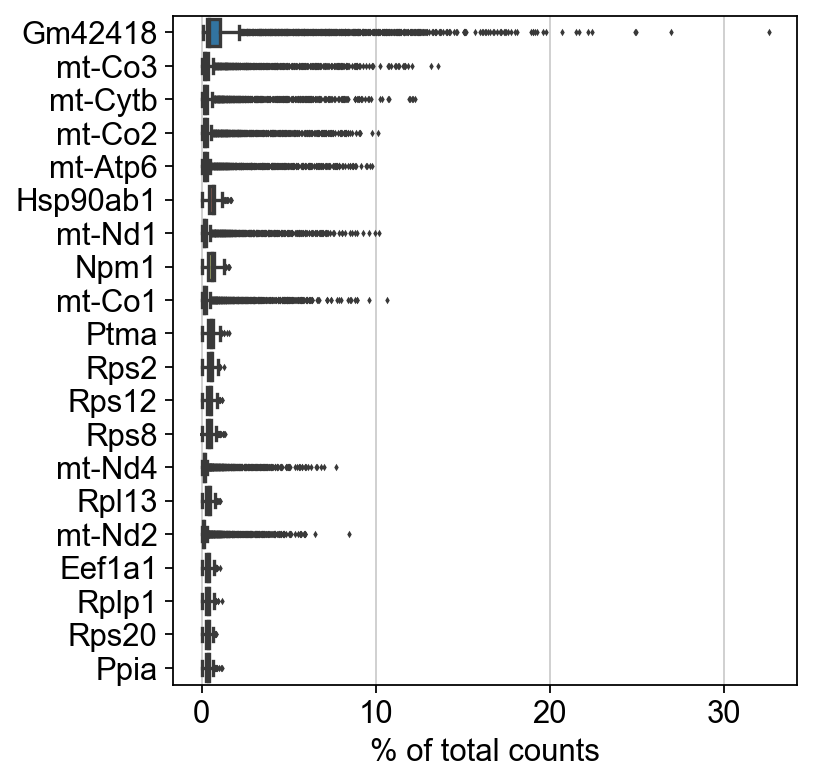

filtered out 9 cells that have less than 200 genes expressed
filtered out 10463 genes that are detected in less than 3 cells


In [16]:
adata3.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata3.obs["plate"] = "P28111_1003" # Записываем в `adata.obs` название платформы
adata3.obs["day"] = "E9.5"
adata3.obs["location"] = "Lens" # Записываем в `adata.obs` название платформы
adata3.layers["counts"] = adata3.X.copy() # Сразу создаём слой с каунтами
adata3.obs["sample_id"] = adata3.obs["plate"]
adata3.obs["genotype"] = "wild_type"
adata3.obs["GSM"] = "GSM_P28111_1003"
adata3.obs_names_make_unique()
sc.pl.highest_expr_genes(adata3, n_top=20, )
sc.pp.filter_cells(adata3, min_genes=200)
sc.pp.filter_genes(adata3, min_cells=3)
adata3.var['mt'] = adata3.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata3, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

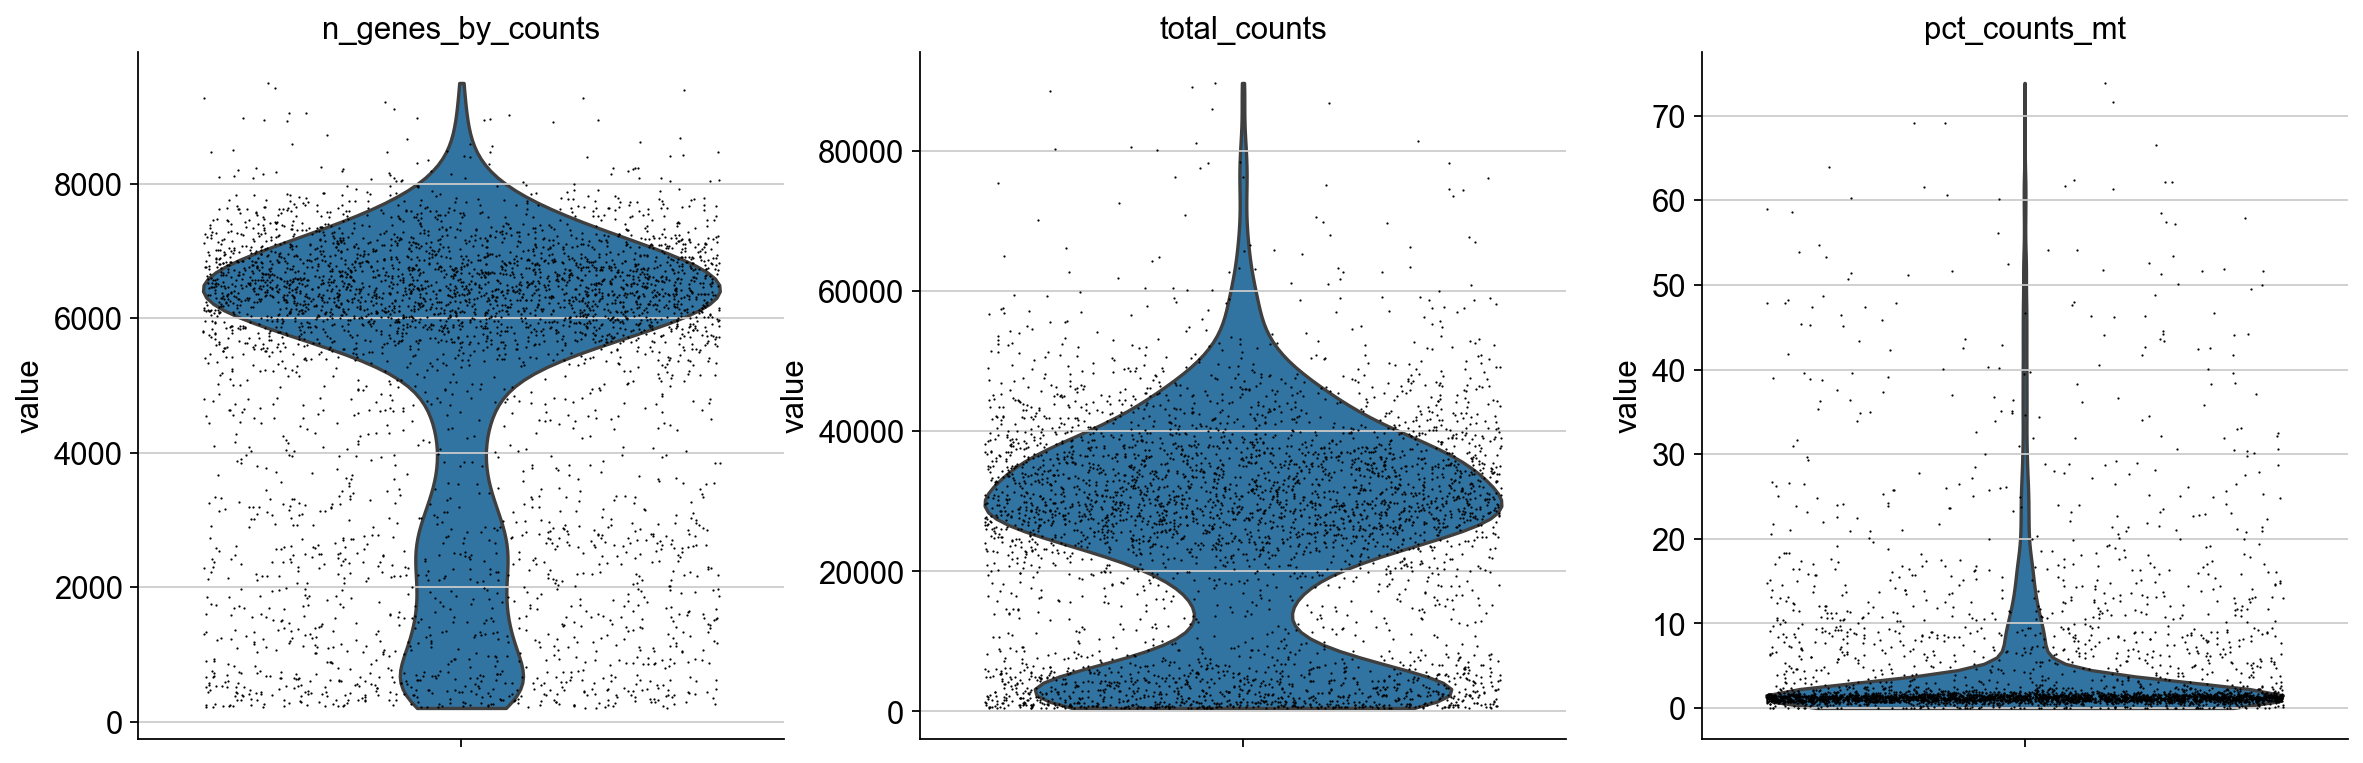

In [17]:
sc.pl.violin(adata3, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [18]:
adata3 = adata3[adata3.obs.n_genes_by_counts > 2500, :].copy()
adata3 = adata3[adata3.obs.total_counts > 8500, :].copy()
adata3 = adata3[adata3.obs.total_counts < 100000, :].copy()
adata3 = adata3[adata3.obs.pct_counts_mt < 14, :].copy()

In [19]:
sc.external.pp.scrublet(adata3) #estimates doublets
adata3 = adata3[adata3.obs['predicted_doublet'] == False] #do the actual filtering
adata3

Running Scrublet
filtered out 111 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 51.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.5%
    Scrublet finished (0:00:06)


View of AnnData object with n_obs × n_vars = 2983 × 21822
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [20]:
adata3

View of AnnData object with n_obs × n_vars = 2983 × 21822
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [21]:
adata4 = sc.read_10x_h5('/home/julia/data/placodes/19-01-2023/P28111_1004_mapped_1/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/19-01-2023/P28111_1004_mapped_1/filtered_feature_bc_matrix.h5
 (0:00:01)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [22]:
adata4

AnnData object with n_obs × n_vars = 29778 × 32285
    var: 'gene_ids', 'feature_types', 'genome'

normalizing counts per cell
    finished (0:00:00)


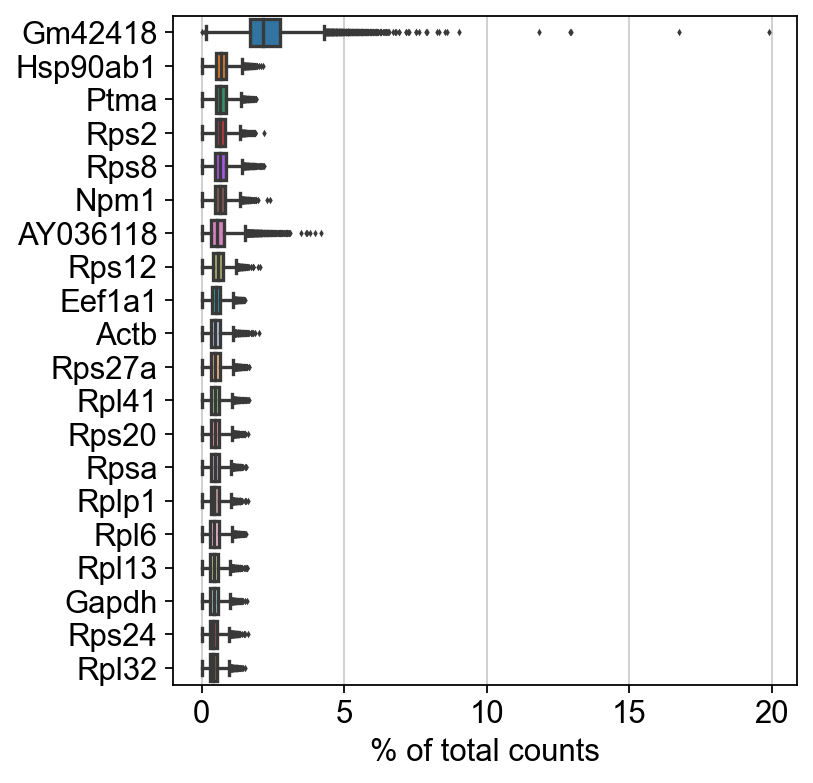

filtered out 10479 genes that are detected in less than 3 cells


In [23]:
adata4.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata4.obs["plate"] = "P28111_1004" # Записываем в `adata.obs` название платформы
adata4.obs["day"] = "E9.5" # Записываем в `adata.obs` название платформы
adata4.obs["location"] = "Epibranchial" # Записываем в `adata.obs` название платформы
adata4.layers["counts"] = adata4.X.copy() # Сразу создаём слой с каунтами
adata4.obs_names_make_unique()
adata4.obs["sample_id"] = adata4.obs["plate"]
adata4.obs["genotype"] = "wild_type"
adata4.obs["GSM"] = "GSM_P28111_1004"
sc.pl.highest_expr_genes(adata4, n_top=20, )
sc.pp.filter_cells(adata4, min_genes=200)
sc.pp.filter_genes(adata4, min_cells=3)
adata4.var['mt'] = adata4.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata4, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

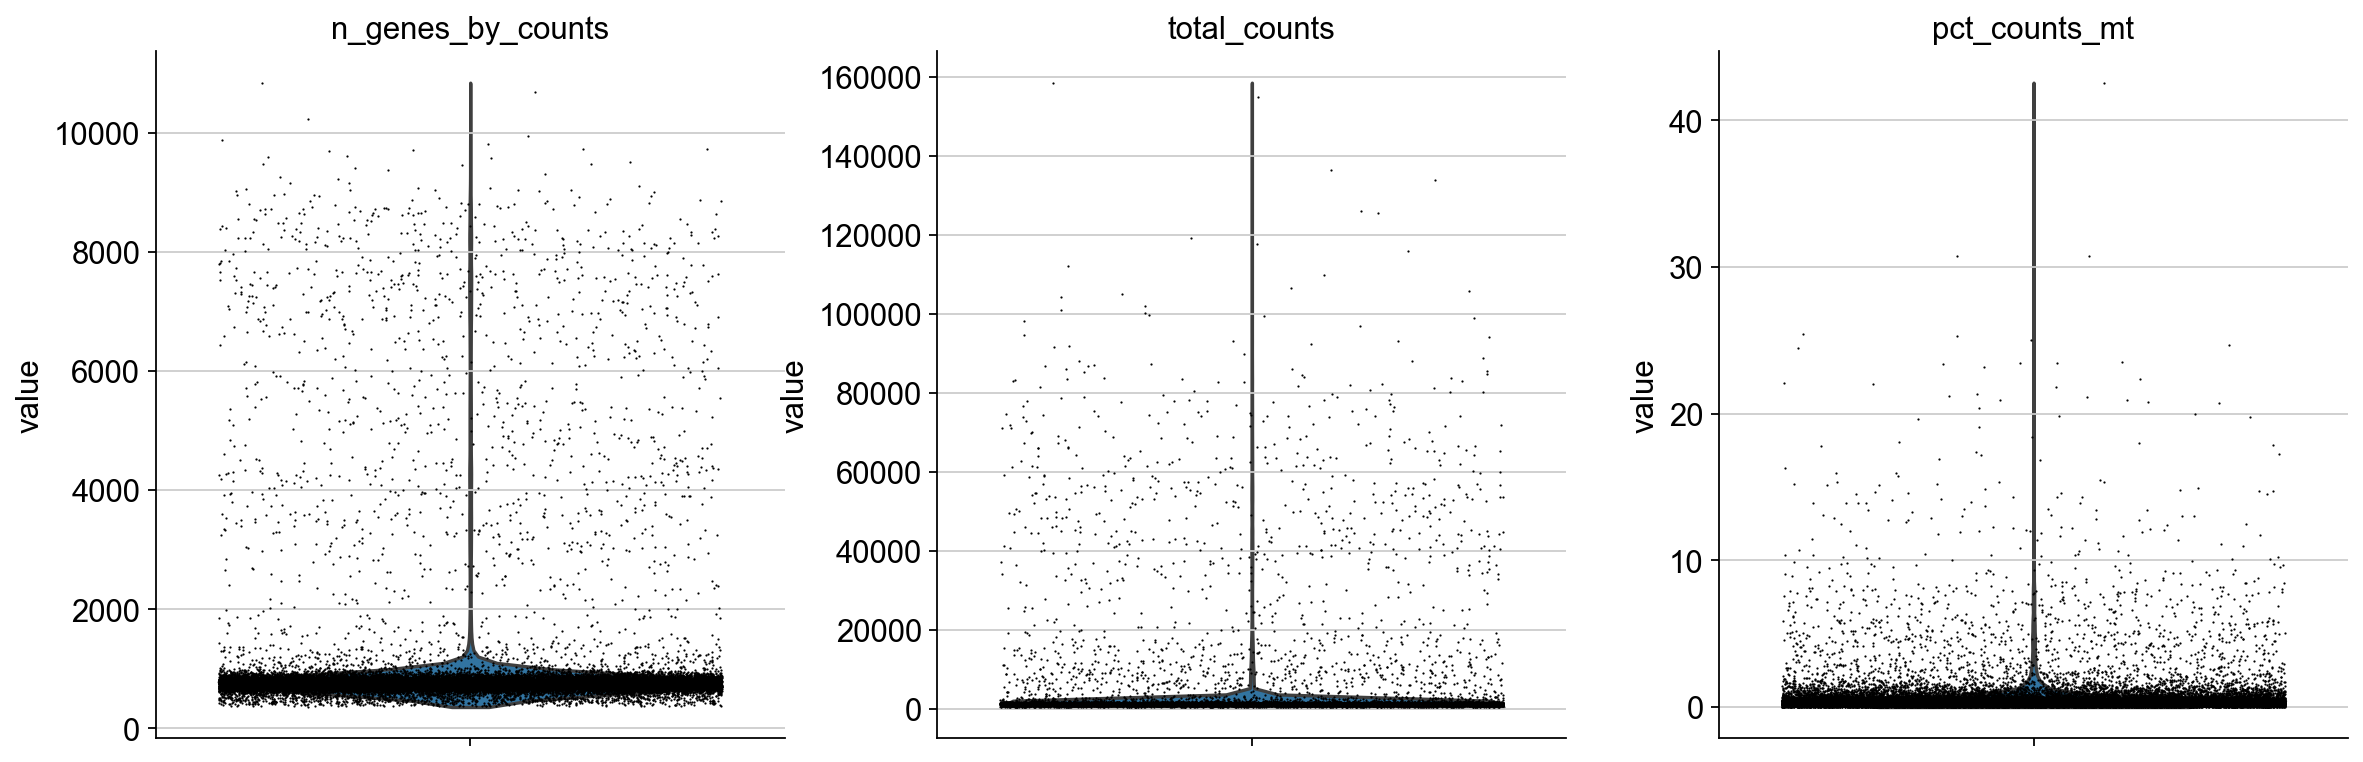

In [24]:
sc.pl.violin(adata4, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [25]:
adata4 = adata4[adata4.obs.n_genes_by_counts > 1500, :].copy()
adata4 = adata4[adata4.obs.total_counts > 12000, :].copy()
adata4 = adata4[adata4.obs.total_counts < 100000, :].copy()
adata4 = adata4[adata4.obs.pct_counts_mt < 15, :].copy()

In [26]:
sc.external.pp.scrublet(adata4) #estimates doublets
adata4 = adata4[adata4.obs['predicted_doublet'] == False] #do the actual filtering
adata4

Running Scrublet
filtered out 1546 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.31
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 16.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.9%
    Scrublet finished (0:00:01)


View of AnnData object with n_obs × n_vars = 811 × 21806
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [27]:
adata5 = sc.read_10x_h5('/home/julia/data/placodes/19-01-2023/P28111_1001_mapped_1/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/19-01-2023/P28111_1001_mapped_1/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [28]:
adata5

AnnData object with n_obs × n_vars = 792 × 32285
    var: 'gene_ids', 'feature_types', 'genome'

In [29]:
adata5.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata5.obs["plate"] = "P28111_1001" # Записываем в `adata.obs` название платформы
adata5.obs["day"] = "E8.5" # Записываем в `adata.obs` название платформы
adata5.obs["location"] = "head" # Записываем в `adata.obs` название платформы
adata5.layers["counts"] = adata5.X.copy() # Сразу создаём слой с каунтами
adata5.obs_names_make_unique()
adata5.obs["sample_id"] = adata5.obs["plate"]
adata5.obs["genotype"] = "wild_type"
adata5.obs["GSM"] = "GSM_P28111_1001"
sc.pp.filter_cells(adata5, min_genes=200)
sc.pp.filter_genes(adata5, min_cells=1)
adata5.var['mt'] = adata5.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata5, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

filtered out 9831 genes that are detected in less than 1 cells


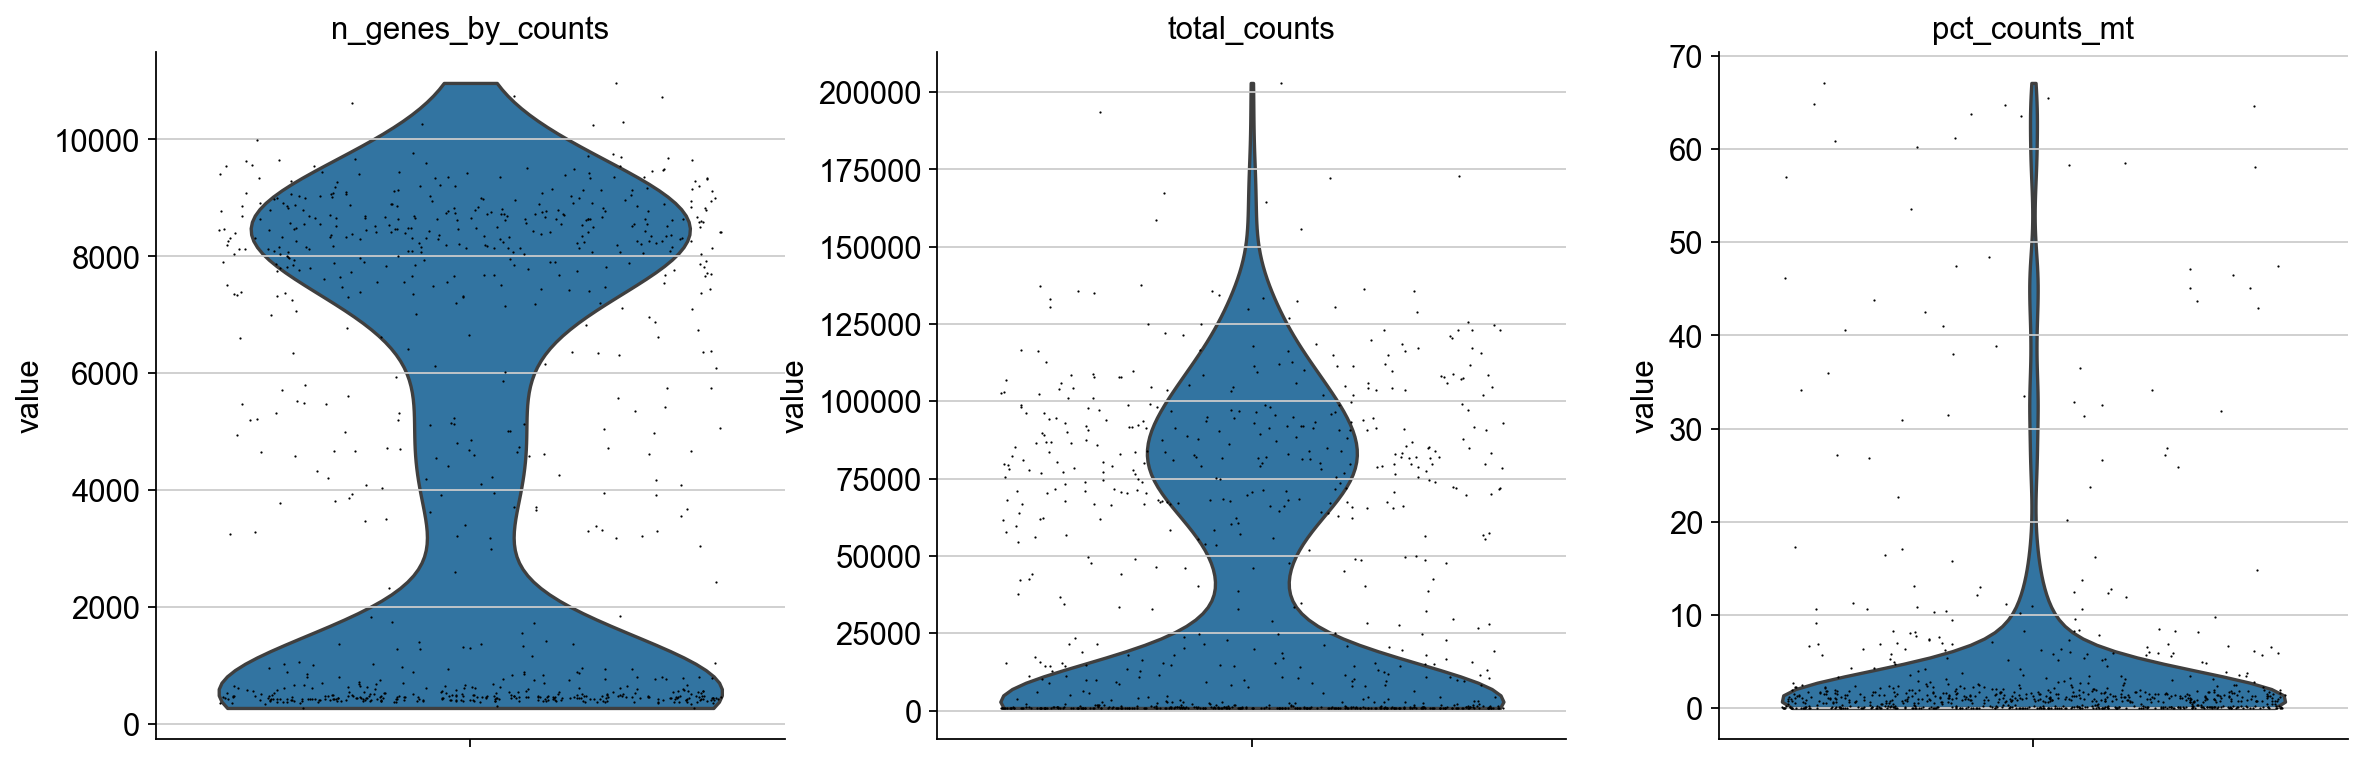

In [30]:
sc.pl.violin(adata5, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [31]:
adata5 = adata5[adata5.obs.n_genes_by_counts > 1000, :].copy()
adata5 = adata5[adata5.obs.total_counts > 8500, :].copy()
adata5 = adata5[adata5.obs.total_counts < 130000, :].copy()
adata5 = adata5[adata5.obs.pct_counts_mt < 15, :].copy()

In [32]:
sc.external.pp.scrublet(adata5) #estimates doublets
adata5 = adata5[adata5.obs['predicted_doublet'] == False] #do the actual filtering
adata5

Running Scrublet
filtered out 3440 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Automatically set threshold at doublet score = 0.24
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 23.9%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.0%
    Scrublet finished (0:00:01)


View of AnnData object with n_obs × n_vars = 420 × 22454
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [33]:
adata6 = sc.read_10x_h5('/home/julia/data/placodes/P29061_1005_mapped/outs/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/P29061_1005_mapped/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [34]:
adata6

AnnData object with n_obs × n_vars = 1771 × 32285
    var: 'gene_ids', 'feature_types', 'genome'

In [35]:
adata6.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata6.obs["plate"] = "P29061_1005" # Записываем в `adata.obs` название платформы
adata6.obs["day"] = "E9.5" # Записываем в `adata.obs` название платформы
adata6.obs["location"] = "Epibranchial" # Записываем в `adata.obs` название платформы
adata6.layers["counts"] = adata6.X.copy() # Сразу создаём слой с каунтами
adata6.obs["sample_id"] = adata6.obs["plate"]
adata6.obs["genotype"] = "wild_type"
adata6.obs["GSM"] = "GSM_P29061_1005"
adata6.obs_names_make_unique()
sc.pp.filter_cells(adata6, min_genes=200)
sc.pp.filter_genes(adata6, min_cells=3)
adata6.var['mt'] = adata6.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata6, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

filtered out 19 cells that have less than 200 genes expressed
filtered out 10099 genes that are detected in less than 3 cells


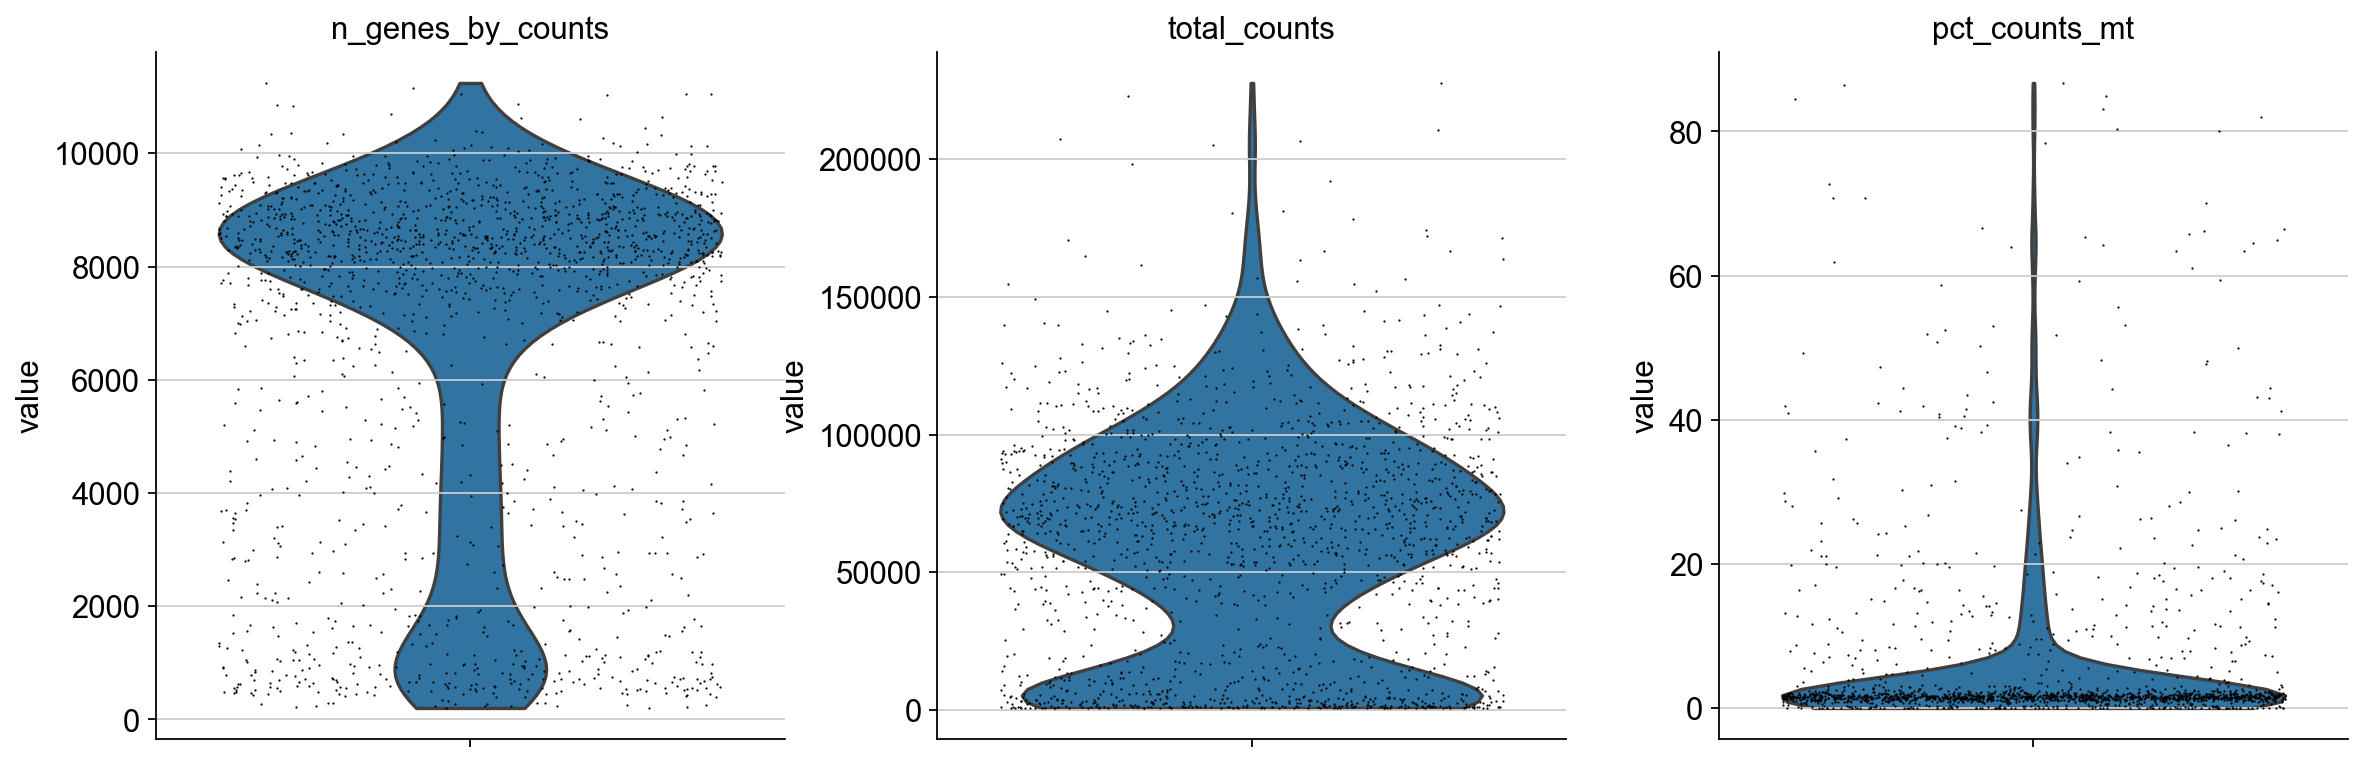

In [36]:
sc.pl.violin(adata6, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [37]:
adata6 = adata6[adata6.obs.n_genes_by_counts > 1700, :].copy()
adata6 = adata6[adata6.obs.total_counts > 3000, :].copy()
adata6 = adata6[adata6.obs.total_counts < 100000, :].copy()
adata6 = adata6[adata6.obs.pct_counts_mt < 15, :].copy()

In [38]:
sc.external.pp.scrublet(adata6) #estimates doublets
adata6 = adata6[adata6.obs['predicted_doublet'] == False] #do the actual filtering
adata6

Running Scrublet
filtered out 734 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.35
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 32.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.5%
    Scrublet finished (0:00:03)


View of AnnData object with n_obs × n_vars = 1156 × 22186
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [39]:
adata7 = sc.read_10x_h5('/home/julia/data/placodes/P29061_1006_mapped/outs/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/P29061_1006_mapped/outs/filtered_feature_bc_matrix.h5
 (0:00:01)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [40]:
adata7

AnnData object with n_obs × n_vars = 5652 × 32285
    var: 'gene_ids', 'feature_types', 'genome'

In [41]:
adata7.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata7.obs["plate"] = "P29061_1006" # Записываем в `adata.obs` название платформы
adata7.obs["day"] = "E9.5" # Записываем в `adata.obs` название платформы
adata7.obs["location"] = "Trigeminal" # Записываем в `adata.obs` название платформы
adata7.layers["counts"] = adata7.X.copy() # Сразу создаём слой с каунтами
adata7.obs_names_make_unique()
adata7.obs["sample_id"] = adata7.obs["plate"]
adata7.obs["genotype"] = "wild_type"
adata7.obs["GSM"] = "GSM_P29061_1006"
sc.pp.filter_cells(adata7, min_genes=200)
sc.pp.filter_genes(adata7, min_cells=3)
adata7.var['mt'] = adata7.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata7, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

filtered out 25 cells that have less than 200 genes expressed
filtered out 9212 genes that are detected in less than 3 cells


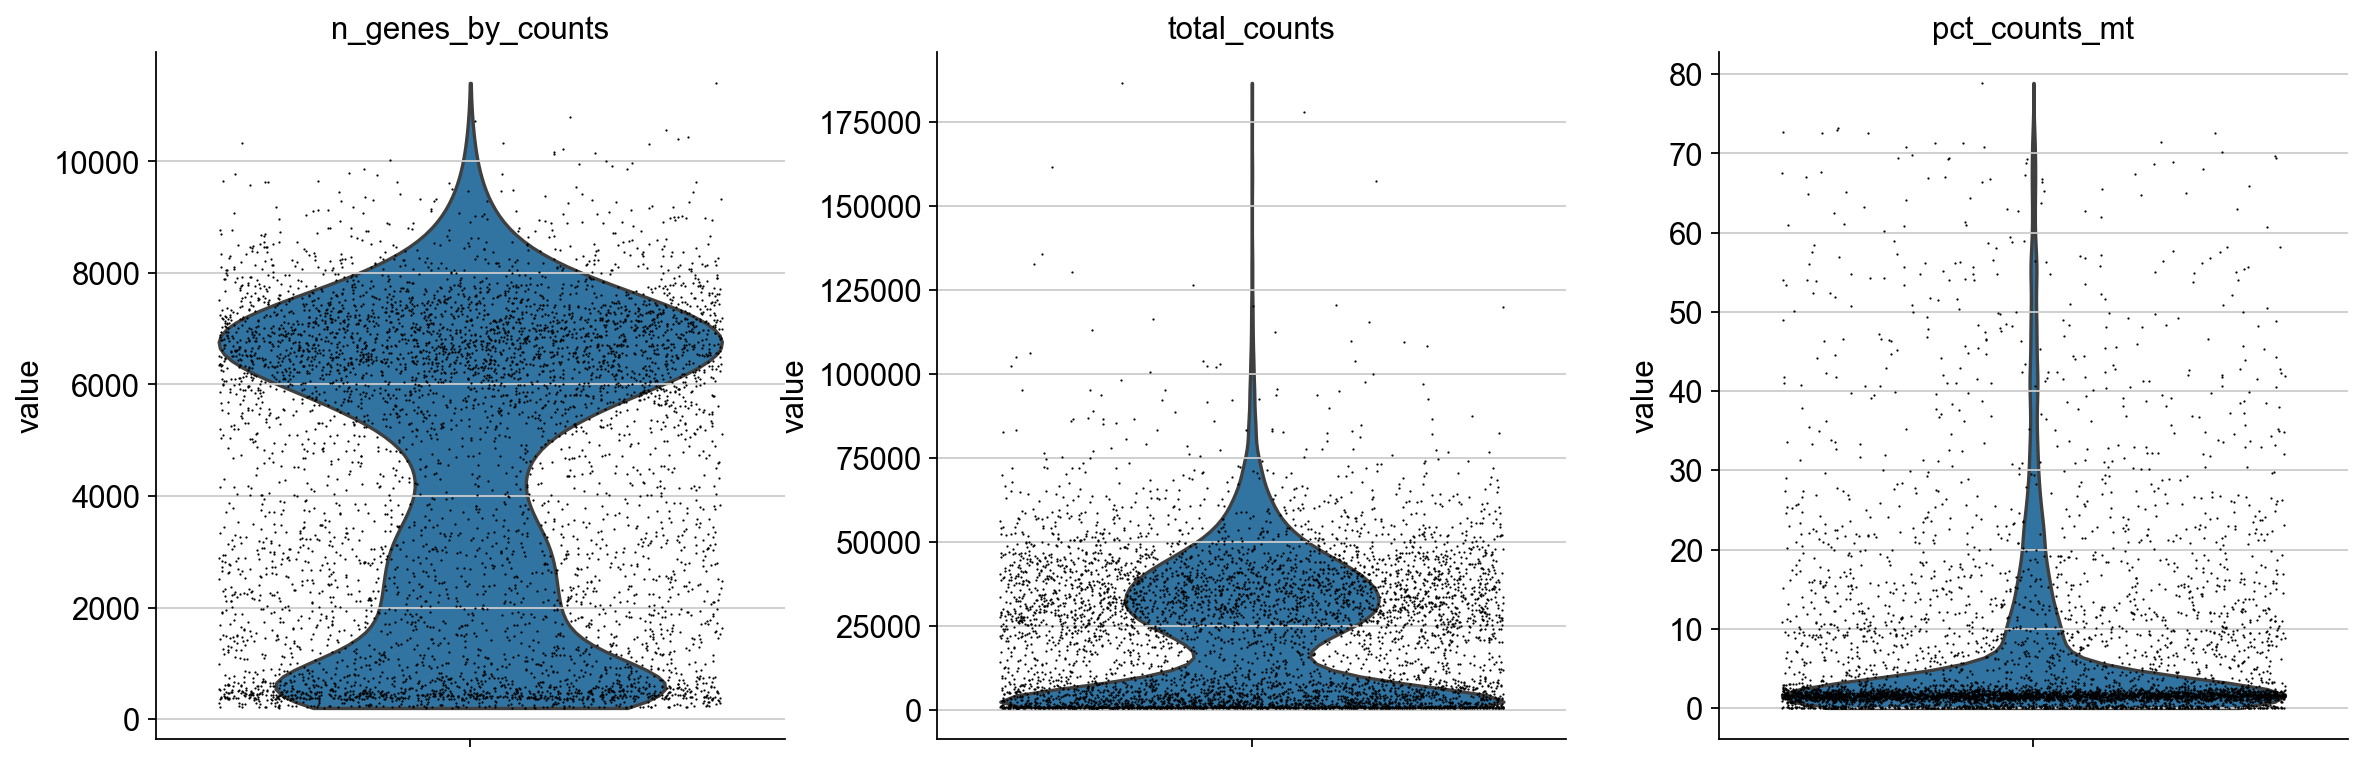

In [42]:
sc.pl.violin(adata7, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [43]:
adata7 = adata7[adata7.obs.n_genes_by_counts > 2000, :].copy()
adata7 = adata7[adata7.obs.total_counts > 10000, :].copy()
adata7 = adata7[adata7.obs.total_counts < 100000, :].copy()
adata7 = adata7[adata7.obs.pct_counts_mt <15, :].copy()

In [44]:
sc.external.pp.scrublet(adata7) #estimates doublets
adata7 = adata7[adata7.obs['predicted_doublet'] == False] #do the actual filtering
adata7

Running Scrublet
filtered out 197 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 3.8%
Estimated detectable doublet fraction = 53.2%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 7.2%
    Scrublet finished (0:00:08)


View of AnnData object with n_obs × n_vars = 3227 × 23073
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [45]:
adata8 = sc.read_10x_h5('/home/julia/data/placodes/ANDY/E8_L003_mapped/outs/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/ANDY/E8_L003_mapped/outs/filtered_feature_bc_matrix.h5
 (0:00:01)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [46]:
adata8.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata8.obs["plate"] = "E8_L003" # Записываем в `adata.obs` название платформы
adata8.obs["day"] = "E8.5" # Записываем в `adata.obs` название платформы
adata8.obs["location"] = "head" # Записываем в `adata.obs` название платформы
adata8.layers["counts"] = adata8.X.copy() # Сразу создаём слой с каунтами
adata8.obs_names_make_unique()
adata8.obs["sample_id"] = adata8.obs["plate"]
adata8.obs["genotype"] = "Foxi3-CreER; ROSA26-tdTomato"
adata8.obs["GSM"] = "GSM_E8_L003"
sc.pp.filter_cells(adata8, min_genes=200)
sc.pp.filter_genes(adata8, min_cells=2)
adata8.var['mt'] = adata8.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata8, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

filtered out 3 cells that have less than 200 genes expressed
filtered out 10886 genes that are detected in less than 2 cells


In [47]:
adata8 = adata8[adata8.obs.n_genes_by_counts < 7000, :].copy()
adata8 = adata8[adata8.obs.n_genes_by_counts > 1000, :].copy()
adata8 = adata8[adata8.obs.pct_counts_mt < 15, :].copy()

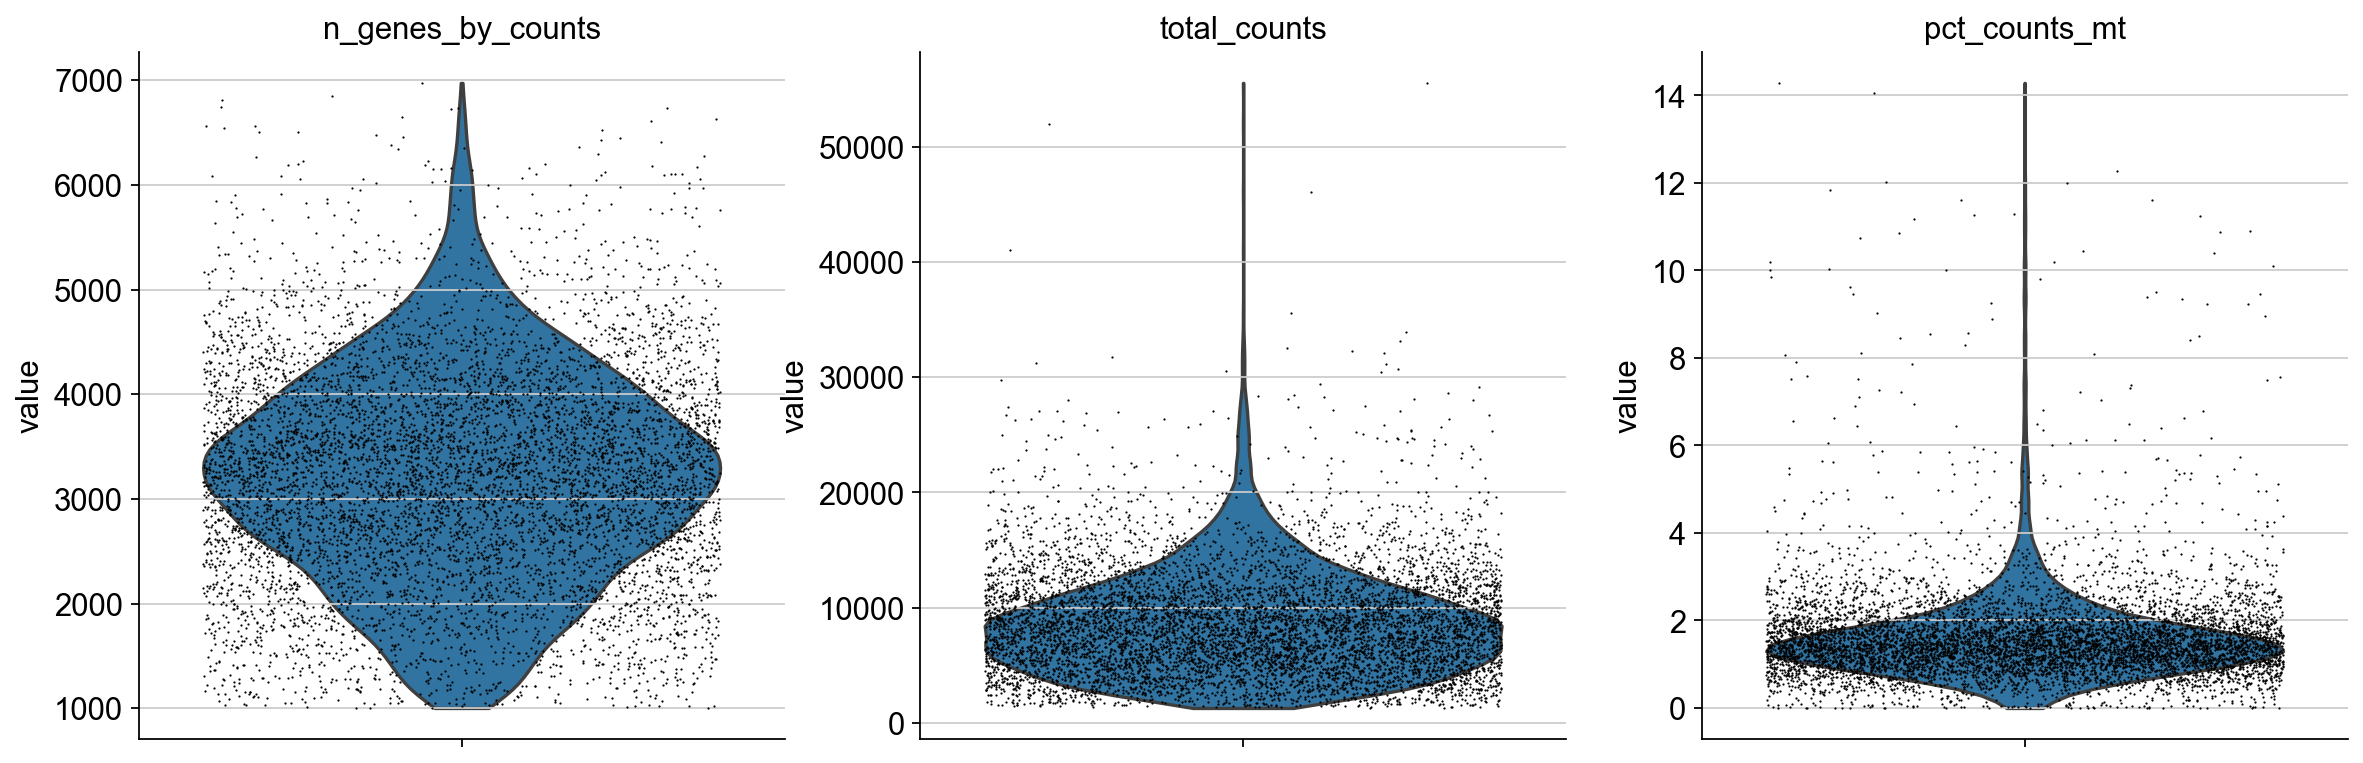

In [48]:
sc.pl.violin(adata8, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],  jitter=0.4, multi_panel=True)

In [49]:
adata8 = adata8[adata8.obs.total_counts < 25000, :].copy()
adata8 = adata8[adata8.obs.pct_counts_mt < 5, :].copy()

In [50]:
sc.external.pp.scrublet(adata8) #estimates doublets
adata8 = adata8[adata8.obs['predicted_doublet'] == False] #do the actual filtering
adata8

Running Scrublet
filtered out 1077 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.1%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.8%
    Scrublet finished (0:00:11)


View of AnnData object with n_obs × n_vars = 7456 × 21399
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [51]:
adata9 = sc.read_10x_h5('/home/julia/data/placodes/ANDY/E8_L004_mapped/outs/filtered_feature_bc_matrix.h5')
adata9.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata9.obs["plate"] = "E8_L004" # Записываем в `adata.obs` название платформы
adata9.obs["day"] = "E8.5" # Записываем в `adata.obs` название платформы
adata9.obs["location"] = "head"
adata9.layers["counts"] = adata9.X.copy() # Сразу создаём слой с каунтами
adata9.obs_names_make_unique()

reading /home/julia/data/placodes/ANDY/E8_L004_mapped/outs/filtered_feature_bc_matrix.h5
 (0:00:01)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [52]:
adata9.obs["sample_id"] = adata9.obs["plate"]
adata9.obs["genotype"] = "Foxi3-CreER; ROSA26-tdTomato"
adata9.obs["GSM"] = "GSM_E8_L004"
sc.pp.filter_cells(adata9, min_genes=200)
sc.pp.filter_genes(adata9, min_cells=2)
adata9.var['mt'] = adata9.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata9, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

filtered out 2 cells that have less than 200 genes expressed
filtered out 10817 genes that are detected in less than 2 cells


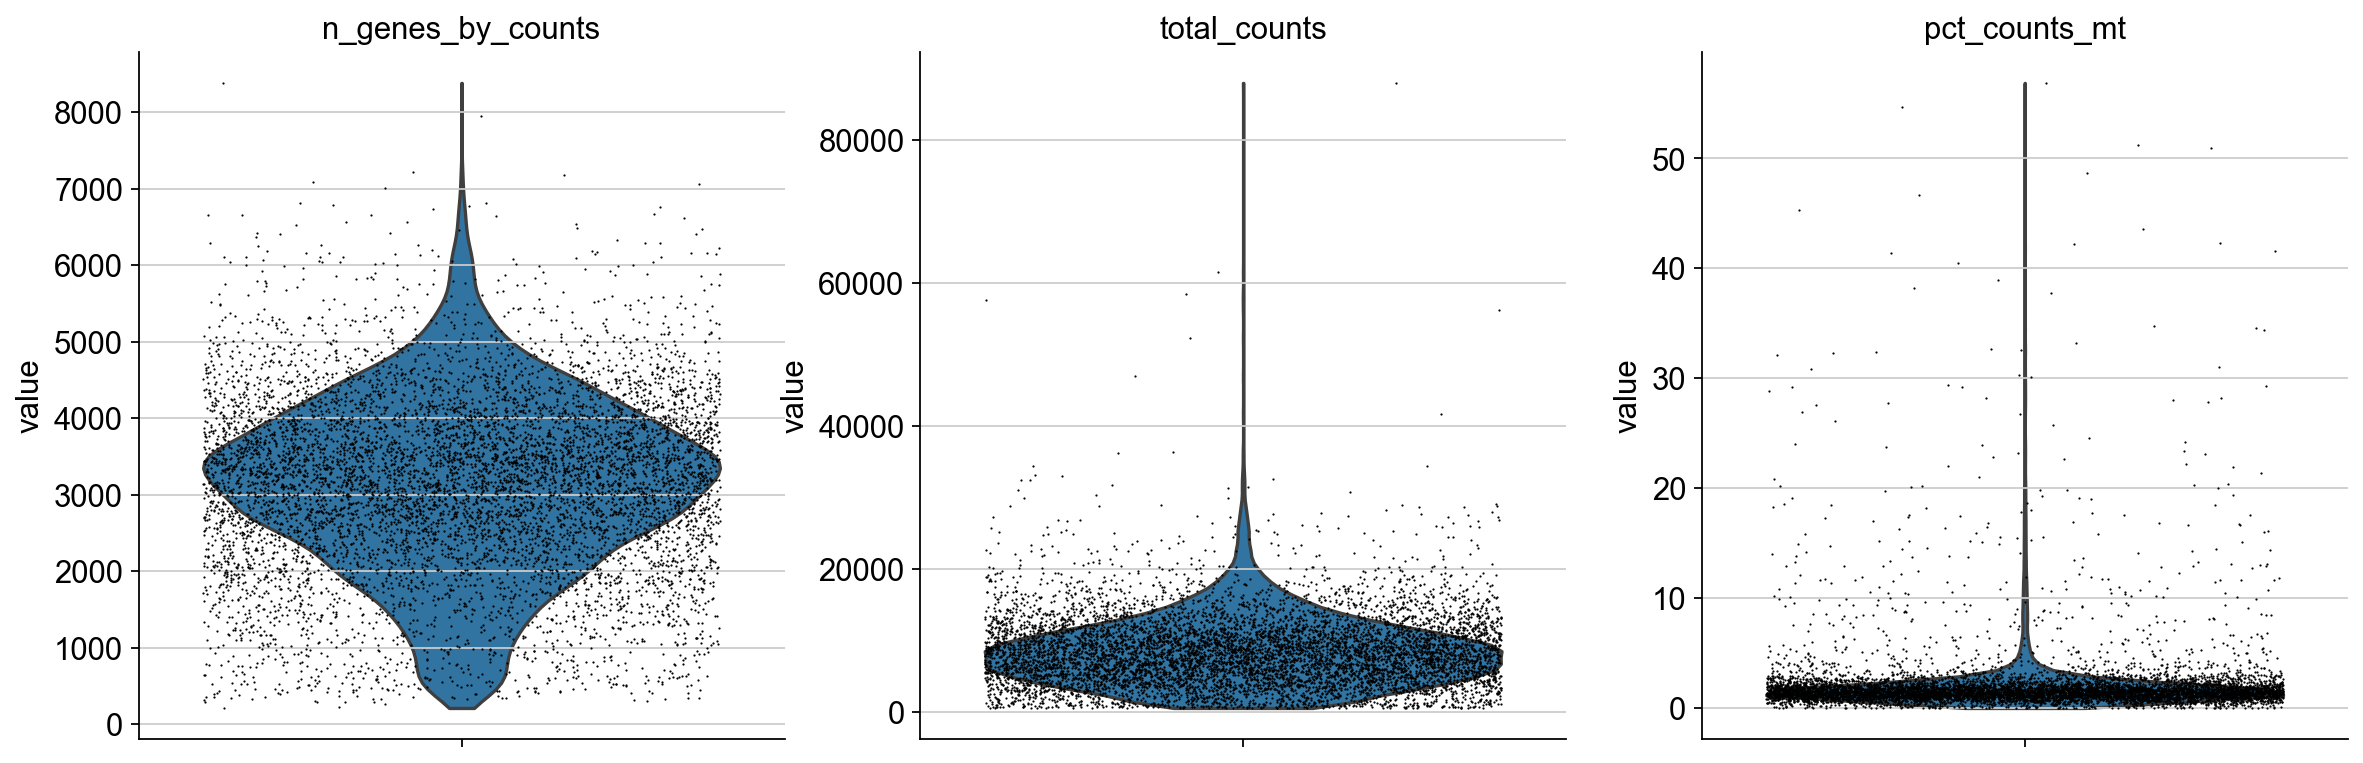

In [53]:
sc.pl.violin(adata9, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [54]:
adata9 = adata9[adata9.obs.n_genes_by_counts <6500, :].copy()
adata9 = adata9[adata9.obs.n_genes_by_counts > 1000, :].copy()
adata9 = adata9[adata9.obs.pct_counts_mt < 15, :].copy()
adata9 = adata9[adata9.obs.total_counts < 20000, :].copy()

In [55]:
sc.external.pp.scrublet(adata9) #estimates doublets
adata9 = adata9[adata9.obs['predicted_doublet'] == False] #do the actual filtering
adata9

Running Scrublet
filtered out 1172 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 4.1%
    Scrublet finished (0:00:12)


View of AnnData object with n_obs × n_vars = 7482 × 21468
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [56]:
adata10 = sc.read_10x_h5('/home/julia/data/placodes/ANDY/E8_L005_mapped/outs/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/ANDY/E8_L005_mapped/outs/filtered_feature_bc_matrix.h5
 (0:00:01)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [57]:
adata10.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata10.obs["plate"] = "E8_L005" # Записываем в `adata.obs` название платформы
adata10.obs["day"] = "E8.5"
adata10.obs["location"] = "head" # Записываем в `adata.obs` название платформы
adata10.layers["counts"] = adata10.X.copy() # Сразу создаём слой с каунтами
adata10.obs["sample_id"] = adata10.obs["plate"]
adata10.obs["genotype"] = "Foxi3-CreER; ROSA26-tdTomato"
adata10.obs["GSM"] = "GSM_E8_L005"
adata10.obs_names_make_unique()
sc.pp.filter_cells(adata10, min_genes=200)
sc.pp.filter_genes(adata10, min_cells=2)
adata10.var['mt'] = adata10.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata10, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

filtered out 2 cells that have less than 200 genes expressed
filtered out 10825 genes that are detected in less than 2 cells


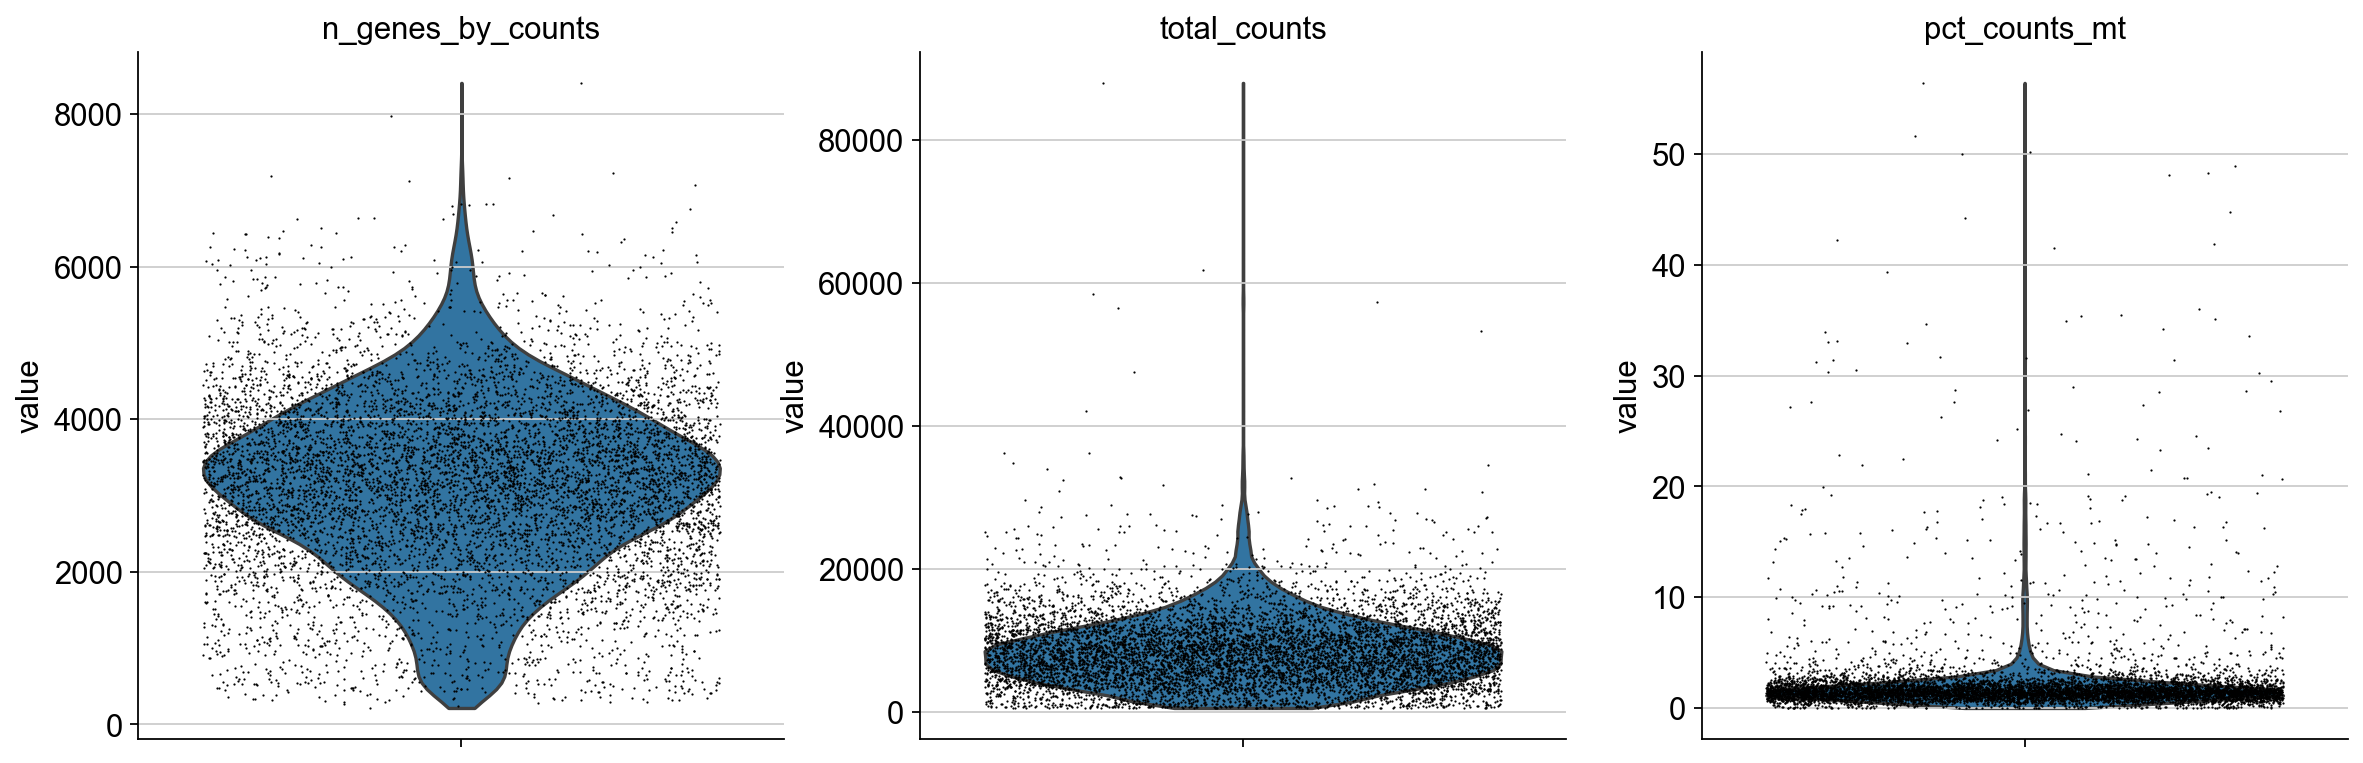

In [58]:
sc.pl.violin(adata10, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [59]:
adata10 = adata10[adata10.obs.n_genes_by_counts < 6000, :].copy()
adata10 = adata10[adata10.obs.pct_counts_mt < 15, :].copy()
adata10 = adata10[adata10.obs.total_counts< 25000, :].copy()

In [60]:
sc.external.pp.scrublet(adata10) #estimates doublets
adata10 = adata10[adata10.obs['predicted_doublet'] == False] #do the actual filtering
adata10

Running Scrublet
filtered out 1059 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.59
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 1.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.2%
    Scrublet finished (0:00:16)


View of AnnData object with n_obs × n_vars = 7813 × 21460
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [61]:
adata11 = sc.read_10x_h5('/home/julia/data/placodes/ANDY/E8_L006_mapped/outs/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/ANDY/E8_L006_mapped/outs/filtered_feature_bc_matrix.h5
 (0:00:01)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


normalizing counts per cell
    finished (0:00:00)


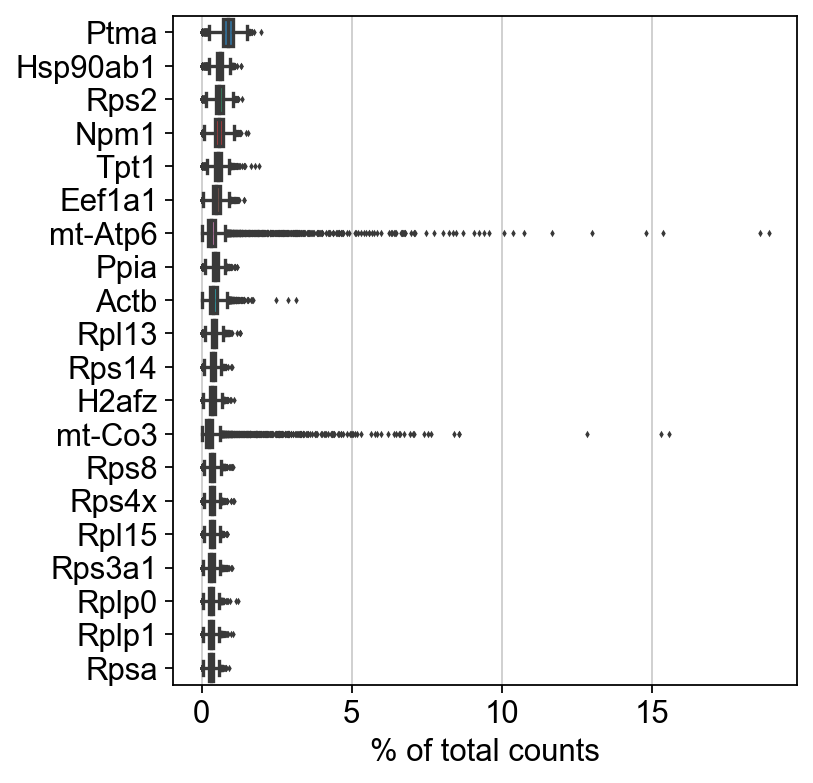

filtered out 3 cells that have less than 200 genes expressed
filtered out 11838 genes that are detected in less than 3 cells


In [62]:
adata11.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata11.obs["plate"] = "E8_L006" # Записываем в `adata.obs` название платформы
adata11.obs["day"] = "E8.5"
adata11.obs["location"] = "head" # Записываем в `adata.obs` название платформы
adata11.layers["counts"] = adata11.X.copy() # Сразу создаём слой с каунтами
adata11.obs["sample_id"] = adata11.obs["plate"]
adata11.obs["genotype"] = "Foxi3-CreER; ROSA26-tdTomato"
adata11.obs["GSM"] = "GSM_E8_L006"
adata11.obs_names_make_unique()
sc.pl.highest_expr_genes(adata11, n_top=20, )
sc.pp.filter_cells(adata11, min_genes=200)
sc.pp.filter_genes(adata11, min_cells=3)
adata11.var['mt'] = adata11.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata11, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

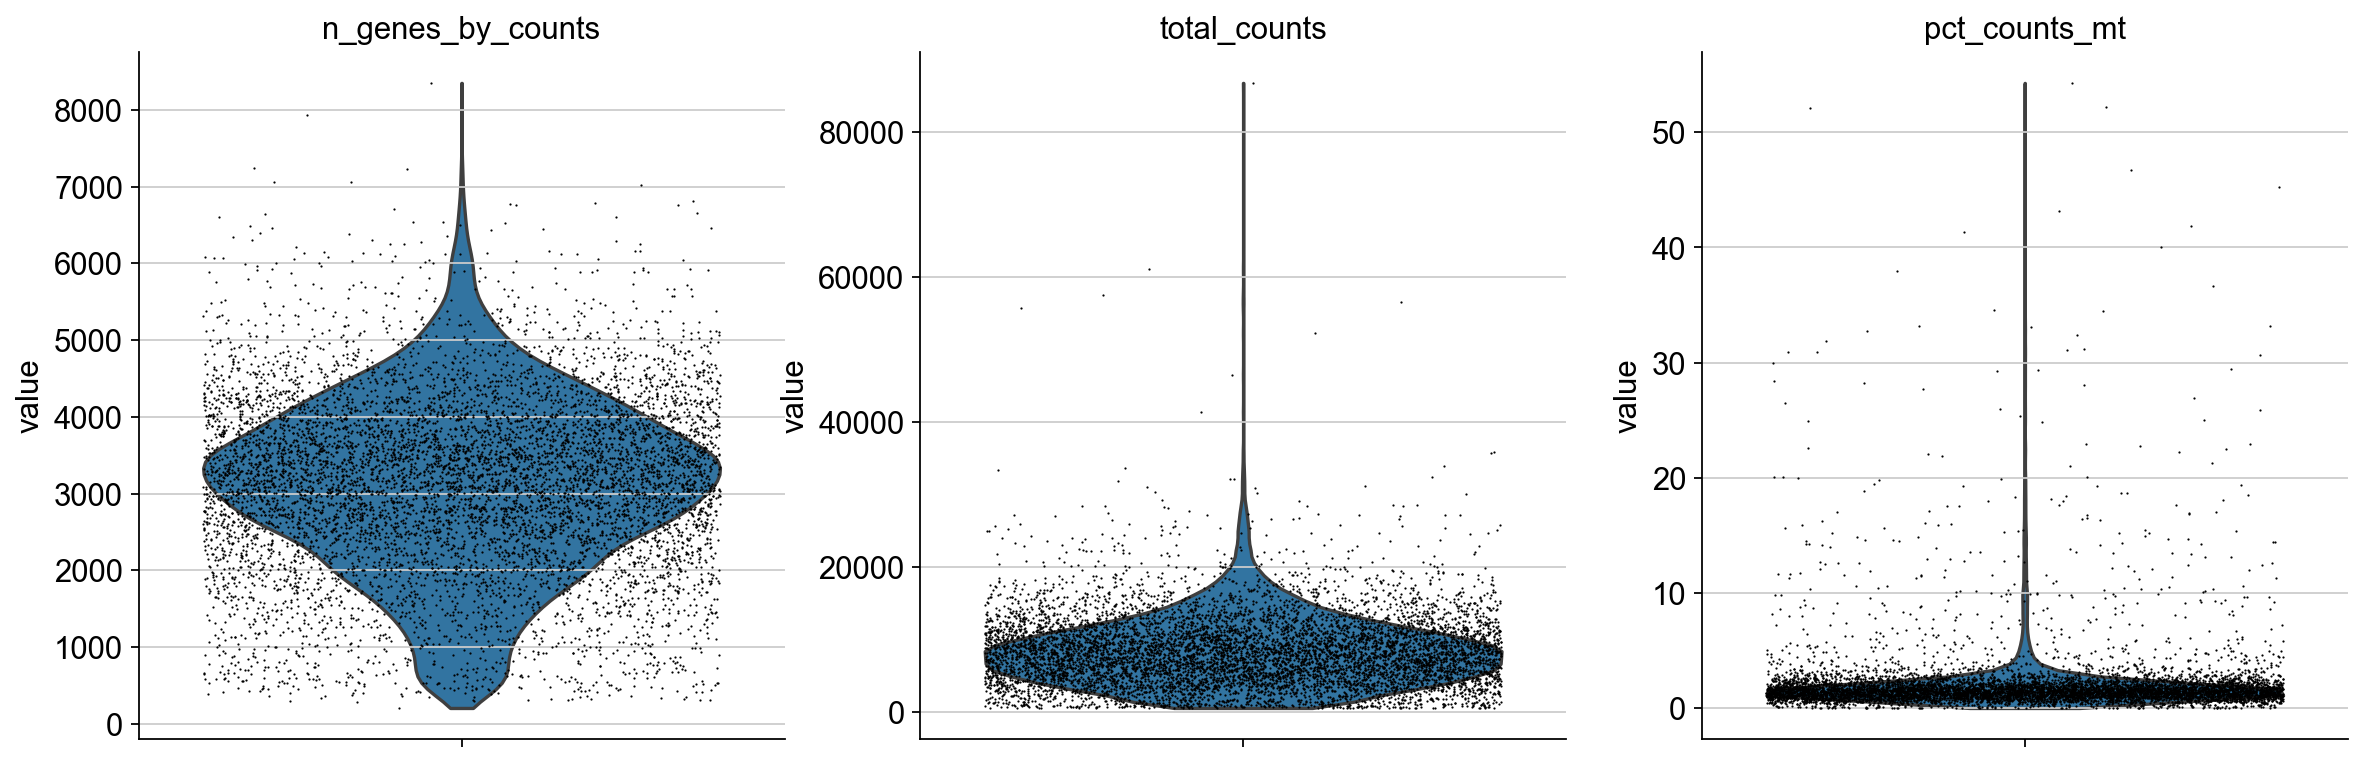

In [63]:
sc.pl.violin(adata11, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [64]:
adata11 = adata11[adata11.obs.n_genes_by_counts < 6500, :].copy()
adata11 = adata11[adata11.obs.pct_counts_mt < 15, :].copy()
adata11 = adata11[adata11.obs.total_counts < 25000, :].copy()

In [65]:
sc.external.pp.scrublet(adata11) #estimates doublets
adata11 = adata11[adata11.obs['predicted_doublet'] == False] #do the actual filtering
adata11

Running Scrublet
filtered out 82 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.60
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 8.8%
    Scrublet finished (0:00:16)


View of AnnData object with n_obs × n_vars = 7854 × 20447
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [66]:
adata12 = sc.read_10x_h5('/home/julia/data/placodes/ANDY/E9_003_mapped/outs/filtered_feature_bc_matrix.h5')

reading /home/julia/data/placodes/ANDY/E9_003_mapped/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [67]:
adata12.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata12.obs["plate"] = "E9_L003" # Записываем в `adata.obs` название платформы
adata12.obs["day"] = "E9.5" # Записываем в `adata.obs` название платформы
adata12.obs["location"] = "head" # Записываем в `adata.obs` название платформы
adata12.layers["counts"] = adata12.X.copy() # Сразу создаём слой с каунтами
adata12.obs["sample_id"] = adata12.obs["plate"]
adata12.obs["genotype"] = "Foxi3-CreER; ROSA26-tdTomato"
adata12.obs["GSM"] = "GSM_E9_L003"
adata12.obs_names_make_unique()
sc.pp.filter_cells(adata12, min_genes=200)
sc.pp.filter_genes(adata12, min_cells=2)
adata12.var['mt'] = adata12.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata12, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

filtered out 67 cells that have less than 200 genes expressed
filtered out 11496 genes that are detected in less than 2 cells


In [68]:
adata12 = adata12[adata12.obs.n_genes_by_counts < 7000, :].copy()
adata12 = adata12[adata12.obs.n_genes_by_counts > 1500, :].copy()
adata12 = adata12[adata12.obs.pct_counts_mt < 15, :].copy()

In [69]:
sc.external.pp.scrublet(adata12) #estimates doublets
adata12 = adata12[adata12.obs['predicted_doublet'] == False] #do the actual filtering
adata12

Running Scrublet
filtered out 1077 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 9.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 3.0%
    Scrublet finished (0:00:06)


View of AnnData object with n_obs × n_vars = 3720 × 20789
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [70]:
adata13 = sc.read_10x_h5('/home/julia/data/placodes/ANDY/E9_004_mapped/outs/filtered_feature_bc_matrix.h5')
adata13.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata13.obs["plate"] = "E9_L004" # Записываем в `adata.obs` название платформы
adata13.obs["day"] = "E9.5" # Записываем в `adata.obs` название платформы
adata13.obs["location"] = "head"
adata13.layers["counts"] = adata13.X.copy() # Сразу создаём слой с каунтами

reading /home/julia/data/placodes/ANDY/E9_004_mapped/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [71]:
adata13.obs["sample_id"] = adata13.obs["plate"]
adata13.obs["genotype"] = "Foxi3-CreER; ROSA26-tdTomato"
adata13.obs["GSM"] = "GSM_E9_L004"
adata13.obs_names_make_unique()
sc.pp.filter_cells(adata13, min_genes=200)
sc.pp.filter_genes(adata13, min_cells=2)
adata13.var['mt'] = adata13.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata13, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata13 = adata13[adata13.obs.n_genes_by_counts <6500, :].copy()
adata13 = adata13[adata13.obs.n_genes_by_counts > 1500, :].copy()

filtered out 63 cells that have less than 200 genes expressed
filtered out 11497 genes that are detected in less than 2 cells


In [72]:
sc.external.pp.scrublet(adata13) #estimates doublets
adata13 = adata13[adata13.obs['predicted_doublet'] == False] #do the actual filtering
adata13

Running Scrublet
filtered out 1139 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 11.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.9%
    Scrublet finished (0:00:06)


View of AnnData object with n_obs × n_vars = 3690 × 20788
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [73]:
adata14 = sc.read_10x_h5('/home/julia/data/placodes/ANDY/E9_005_mapped/outs/filtered_feature_bc_matrix.h5')
adata14.var_names_make_unique() # Делаем так, чтобы все гены имели уникальные имена
adata14.obs["plate"] = "E9_L005" # Записываем в `adata.obs` название платформы
adata14.obs["day"] = "E9.5"
adata14.obs["location"] = "head" # Записываем в `adata.obs` название платформы
adata14.layers["counts"] = adata14.X.copy() # Сразу создаём слой с каунтами
adata14.obs_names_make_unique()
adata14.obs["sample_id"] = adata14.obs["plate"]
adata14.obs["genotype"] = "Foxi3-CreER; ROSA26-tdTomato"
adata14.obs["GSM"] = "GSM_E9_L005"
sc.pp.filter_cells(adata14, min_genes=200)
sc.pp.filter_genes(adata14, min_cells=2)
adata14.var['mt'] = adata14.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata14, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

reading /home/julia/data/placodes/ANDY/E9_005_mapped/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 67 cells that have less than 200 genes expressed
filtered out 11429 genes that are detected in less than 2 cells


In [74]:
adata14 = adata14[adata14.obs.n_genes_by_counts < 6000, :].copy()
adata14 = adata14[adata14.obs.n_genes_by_counts > 1000, :].copy()
adata14 = adata14[adata14.obs.total_counts > 4500, :].copy()
adata14 = adata14[adata14.obs.pct_counts_mt < 15, :].copy()

In [75]:
sc.external.pp.scrublet(adata14) #estimates doublets
adata14 = adata14[adata14.obs['predicted_doublet'] == False] #do the actual filtering
adata14

Running Scrublet
filtered out 1313 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.48
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 16.4%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.3%
    Scrublet finished (0:00:05)


View of AnnData object with n_obs × n_vars = 3386 × 20856
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [76]:
adata15 = sc.read_10x_h5('/home/julia/data/placodes/ANDY/E9_006_mapped/outs/filtered_feature_bc_matrix.h5')
adata15.var_names_make_unique() 
adata15.obs["plate"] = "E9_L006"
adata15.obs["day"] = "E9.5"
adata15.obs["location"] = "head" 
adata15.layers["counts"] = adata15.X.copy()
adata15.obs_names_make_unique()
adata15.obs["sample_id"] = adata15.obs["plate"]
adata15.obs["genotype"] = "Foxi3-CreER; ROSA26-tdTomato"
adata15.obs["GSM"] = "GSM_E9_L006"
adata15.obs_names_make_unique()
sc.pp.filter_cells(adata15, min_genes=200)
sc.pp.filter_genes(adata15, min_cells=1)
adata15.var['mt'] = adata15.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata15, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata15 = adata15[adata15.obs.n_genes_by_counts < 6500, :].copy()
adata15 = adata15[adata15.obs.n_genes_by_counts > 2000, :].copy()
adata15 = adata15[adata15.obs.pct_counts_mt < 15, :].copy()
sc.external.pp.scrublet(adata15) #estimates doublets
adata15 = adata15[adata15.obs['predicted_doublet'] == False] 
adata15

reading /home/julia/data/placodes/ANDY/E9_006_mapped/outs/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 69 cells that have less than 200 genes expressed
filtered out 9637 genes that are detected in less than 1 cells
Running Scrublet
filtered out 3040 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.49
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 13.0%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.0%
    Scrublet finished (0:00:06)


View of AnnData object with n_obs × n_vars = 3516 × 22648
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'
    layers: 'counts'

In [77]:
adata=adata1.concatenate(adata2,adata3, adata4,adata5,adata6, adata7,adata8,adata9,adata10, adata11, adata12,adata13, adata14,adata15,index_unique=None, join='outer' )

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(s

In [78]:
adata

AnnData object with n_obs × n_vars = 62269 × 25865
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'genome-10', 'mt-10', 'n_cells_by_counts-10', 'mean_counts-10', 'pct_dropout_by_counts-10', 'total_counts-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'genome-11', 'mt-11', 'n_cells_by_counts-11', 'mean_counts-11', 'pct_dropout_by_counts-11', 'total_counts-11', 'n_cells-11', 'gene_ids-12', 'feature_types-12', 'genome-12', 'mt-12', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_coun

In [79]:
adata.var=adata.var.drop(columns = [
'gene_ids-0', 'feature_types-0', 'genome-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'genome-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'genome-10', 'mt-10', 'n_cells_by_counts-10', 'mean_counts-10', 'pct_dropout_by_counts-10', 'total_counts-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'genome-11', 'mt-11', 'n_cells_by_counts-11', 'mean_counts-11', 'pct_dropout_by_counts-11', 'total_counts-11', 'n_cells-11', 'gene_ids-12', 'feature_types-12', 'genome-12', 'mt-12', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_counts-12', 'total_counts-12', 'n_cells-12', 'gene_ids-13', 'feature_types-13', 'genome-13', 'mt-13', 'n_cells_by_counts-13', 'mean_counts-13', 'pct_dropout_by_counts-13', 'total_counts-13', 'n_cells-13', 'gene_ids-14', 'feature_types-14', 'genome-14', 'mt-14', 'n_cells_by_counts-14', 'mean_counts-14', 'pct_dropout_by_counts-14', 'total_counts-14', 'n_cells-14', 'gene_ids-2', 'feature_types-2', 'genome-2', 'mt-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'genome-3', 'mt-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'genome-4', 'mt-4', 'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'genome-5', 'mt-5', 'n_cells_by_counts-5', 'mean_counts-5', 'pct_dropout_by_counts-5', 'total_counts-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'genome-6', 'mt-6', 'n_cells_by_counts-6', 'mean_counts-6', 'pct_dropout_by_counts-6', 'total_counts-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'genome-7', 'mt-7', 'n_cells_by_counts-7', 'mean_counts-7', 'pct_dropout_by_counts-7', 'total_counts-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'genome-8', 'mt-8', 'n_cells_by_counts-8', 'mean_counts-8', 'pct_dropout_by_counts-8', 'total_counts-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'genome-9', 'mt-9', 'n_cells_by_counts-9', 'mean_counts-9', 'pct_dropout_by_counts-9', 'total_counts-9', 'n_cells-9'
    ])
    

In [80]:
adata.var_names_make_unique() 

In [81]:
adata.obs

plate   day location    sample_id  \
AAACCCAAGATGCGAC-1  P27217_1001  E8.5     head  P27217_1001   
AAACCCAAGGTTCCAT-1  P27217_1001  E8.5     head  P27217_1001   
AAACCCAGTAAGTAGT-1  P27217_1001  E8.5     head  P27217_1001   
AAACCCAGTCGAGATG-1  P27217_1001  E8.5     head  P27217_1001   
AAACCCATCTTTCTAG-1  P27217_1001  E8.5     head  P27217_1001   
...                         ...   ...      ...          ...   
TTTGTTGAGCAAGCCA-1      E9_L006  E9.5     head      E9_L006   
TTTGTTGAGGCAGCTA-1      E9_L006  E9.5     head      E9_L006   
TTTGTTGCACCATATG-1      E9_L006  E9.5     head      E9_L006   
TTTGTTGCATTCTTCA-1      E9_L006  E9.5     head      E9_L006   
TTTGTTGTCCTAAACG-1      E9_L006  E9.5     head      E9_L006   

                                        genotype              GSM  \
AAACCCAAGATGCGAC-1                     wild_type  GSM_P27217_1001   
AAACCCAAGGTTCCAT-1                     wild_type  GSM_P27217_1001   
AAACCCAGTAAGTAGT-1                     wild_type  GSM_P27217_1001   
AAACCCAGTCGAGATG-1                     wild_type  GSM_P27217_1001   
AAACCCATCTTTCTAG-1                     wild_type  GSM_P27217_1001   
...                                          ...              ...   
TTTGTTGAGCAAGCCA-1  Foxi3-CreER; ROSA26-tdTomato      GSM_E9_L006   
TTTGTTGAGGCAGCTA-1  Foxi3-CreER; ROSA26-tdTomato      GSM_E9_L006   
TTTGTTGCACCATATG-1  Foxi3-CreER; ROSA26-tdTomato      GSM_E9_L006   
TTTGTTGCATTCTTCA-1  Foxi3-CreER; ROSA26-tdTomato      GSM_E9_L006   
TTTGTTGTCCTAAACG-1  Foxi3-CreER; ROSA26-tdTomato      GSM_E9_L006   

                    n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCAAGATGCGAC-1               5807       30060.0            527.0   
AAACCCAAGGTTCCAT-1               7550       48373.0            777.0   
AAACCCAGTAAGTAGT-1               7495       56462.0           1376.0   
AAACCCAGTCGAGATG-1               7745       51452.0            878.0   
AAACCCATCTTTCTAG-1               6427       34047.0            289.0   
...                               ...           ...              ...   
TTTGTTGAGCAAGCCA-1               4037       12362.0            369.0   
TTTGTTGAGGCAGCTA-1               3619       10951.0            196.0   
TTTGTTGCACCATATG-1               5961       28277.0            421.0   
TTTGTTGCATTCTTCA-1               4454       12470.0            242.0   
TTTGTTGTCCTAAACG-1               4537       13687.0            282.0   

                    pct_counts_mt  n_genes  doublet_score  predicted_doublet  \
AAACCCAAGATGCGAC-1       1.753160     5807       0.029544              False   
AAACCCAAGGTTCCAT-1       1.606268     7550       0.074842              False   
AAACCCAGTAAGTAGT-1       2.437037     7495       0.053381              False   
AAACCCAGTCGAGATG-1       1.706445     7745       0.015994              False   
AAACCCATCTTTCTAG-1       0.848827     6427       0.017893              False   
...                           ...      ...            ...                ...   
TTTGTTGAGCAAGCCA-1       2.984954     4037       0.024577              False   
TTTGTTGAGGCAGCTA-1       1.789791     3619       0.014505              False   
TTTGTTGCACCATATG-1       1.488842     5961       0.041096              False   
TTTGTTGCATTCTTCA-1       1.940658     4454       0.073171              False   
TTTGTTGTCCTAAACG-1       2.060349     4537       0.047022              False   

                   batch  
AAACCCAAGATGCGAC-1     0  
AAACCCAAGGTTCCAT-1     0  
AAACCCAGTAAGTAGT-1     0  
AAACCCAGTCGAGATG-1     0  
AAACCCATCTTTCTAG-1     0  
...                  ...  
TTTGTTGAGCAAGCCA-1    14  
TTTGTTGAGGCAGCTA-1    14  
TTTGTTGCACCATATG-1    14  
TTTGTTGCATTCTTCA-1    14  
TTTGTTGTCCTAAACG-1    14  

[62269 rows x 14 columns]

In [82]:
adata

AnnData object with n_obs × n_vars = 62269 × 25865
    obs: 'plate', 'day', 'location', 'sample_id', 'genotype', 'GSM', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch'
    layers: 'counts'

In [83]:
adata.obs[["plate", "sample_id", "GSM",  "genotype", "day"]].head()


plate    sample_id              GSM   genotype   day
AAACCCAAGATGCGAC-1  P27217_1001  P27217_1001  GSM_P27217_1001  wild_type  E8.5
AAACCCAAGGTTCCAT-1  P27217_1001  P27217_1001  GSM_P27217_1001  wild_type  E8.5
AAACCCAGTAAGTAGT-1  P27217_1001  P27217_1001  GSM_P27217_1001  wild_type  E8.5
AAACCCAGTCGAGATG-1  P27217_1001  P27217_1001  GSM_P27217_1001  wild_type  E8.5
AAACCCATCTTTCTAG-1  P27217_1001  P27217_1001  GSM_P27217_1001  wild_type  E8.5

In [84]:
adata.write('/home/julia/data/placodes/h5ad/adata_QC_filtered.h5ad')